# **HACKTIV8 - BATCH 3 - FINAL PROJECT 1**
1. Alifia Mustika Sari
2. Naila Qisthi Azzahra

# **INTRODUCTION**
---

**Problem Statement**

Tarif taksi Uber dan Lyft tidak stabil layaknya transportasi publik. Mereka sangat dipengaruhi oleh permintaan dan penawaran jasa layanan transportasi pada waktu tertentu. Kita akan mengetahui hal apa saja yang mendorong permintaan jasa layanan transportasi dan bagaimana tarifnya dapat bervariasi. Perbedaan waktu dapat menyebabkan lonjakan jumlah permintaan.

**Objectives** 
- Untuk memahami faktor-faktor yang mempengaruhi tarif taksi
- Untuk memprediksi tarif jasa layanan transportasi berdasarkan faktor-faktor tersebut

**Defining the Metrics for Success**

Proyek kami akan dianggap berhasil ketika kami memahami faktor-faktor yang memengaruhi harga taksi dan membuat model prediktif serta kinerjanya dievaluasi

# **IMPORT LIBRARIES**
---

In [527]:
# for data
import pandas as pd
import numpy as np
import math

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# for encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# for splitting data
from sklearn.model_selection import train_test_split

# for building model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,ShuffleSplit

# for evaluating model
from sklearn.model_selection import cross_val_score
# Since you are doing a regression task, you should be using the metric R-squared (co-effecient of determination)
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

# for deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

# **DATA LOADING**
---

In [528]:
# real data
df_raw = pd.read_csv('rideshare_kaggle.csv', encoding='latin-1')
print ('Data read into a pandas dataframe!')
df_raw.head(2)

Data read into a pandas dataframe!


id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   

  cab_type    product_id    name  price  distance  surge_multiplier  latitude  \
0     Lyft     lyft_line  Shared    5.0      0.44               1.0   42.2148   
1     Lyft  lyft_premier     Lux   11.0      0.44               1.0   42.2148   

   longitude  temperature  apparentTemperature    short_summary  \
0    -71.033        42.34                37.12   Mostly Cloudy    
1    -71.033        43.58                37.35            Rain    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  visibility.1  ozone  \
0     32.70   1021.98           57        0.72        0        10.000  303.8   
1     41.83   1003.97           90        1.00        0         4.786  291.1   

   sunriseTime  sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  \
0   1544962084  1544994864       0.30              0.1276   1544979600   
1   1543232969  1543266992       0.64              0.1300   1543251600   

   temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
0           39.89          1545012000           43.68          1544968800   
1           40.49          1543233600           47.30          1543251600   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   

   apparentTemperatureMaxTime  
0                  1544958000  
1                  1543251600

In [529]:
df_raw.shape

(693071, 57)

Dataset memiliki 693071 dan 57 kolom

In [530]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Pada hasil di atas terlihat bahwa tipe data semua fitur kolom dataset sangat bervariasi yaitu kategorikal dan numerik

# **DATA CLEANING**
---

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [531]:
# data for data cleaning
df = df_raw.copy()

In [532]:
# Membuat list yang isinya missing value yang tidak umum
missing_values = ["n/a", "na", "--", " ", "NA", "NAn", "N/A"]

df = pd.read_csv('rideshare_kaggle.csv', encoding='latin-1', na_values = missing_values)

## Duplikasi Data

Pada tahap ini dilakukan untuk melihat apakah terdapat duplikasi data dalam dataset

In [533]:
print(df.duplicated())
print("Total Duplikasi Data :", df.duplicated().sum())

0         False
1         False
2         False
3         False
4         False
          ...  
693066    False
693067    False
693068    False
693069    False
693070    False
Length: 693071, dtype: bool
Total Duplikasi Data : 0


Dapat terlihat bahwa pada dataset yang digunakan tidak terdapat duplikasi data dalam dataset

## Standard Missing Value

Pada tahap ini dilakukan untuk melihat apakah terdapat missing value pada dataset

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

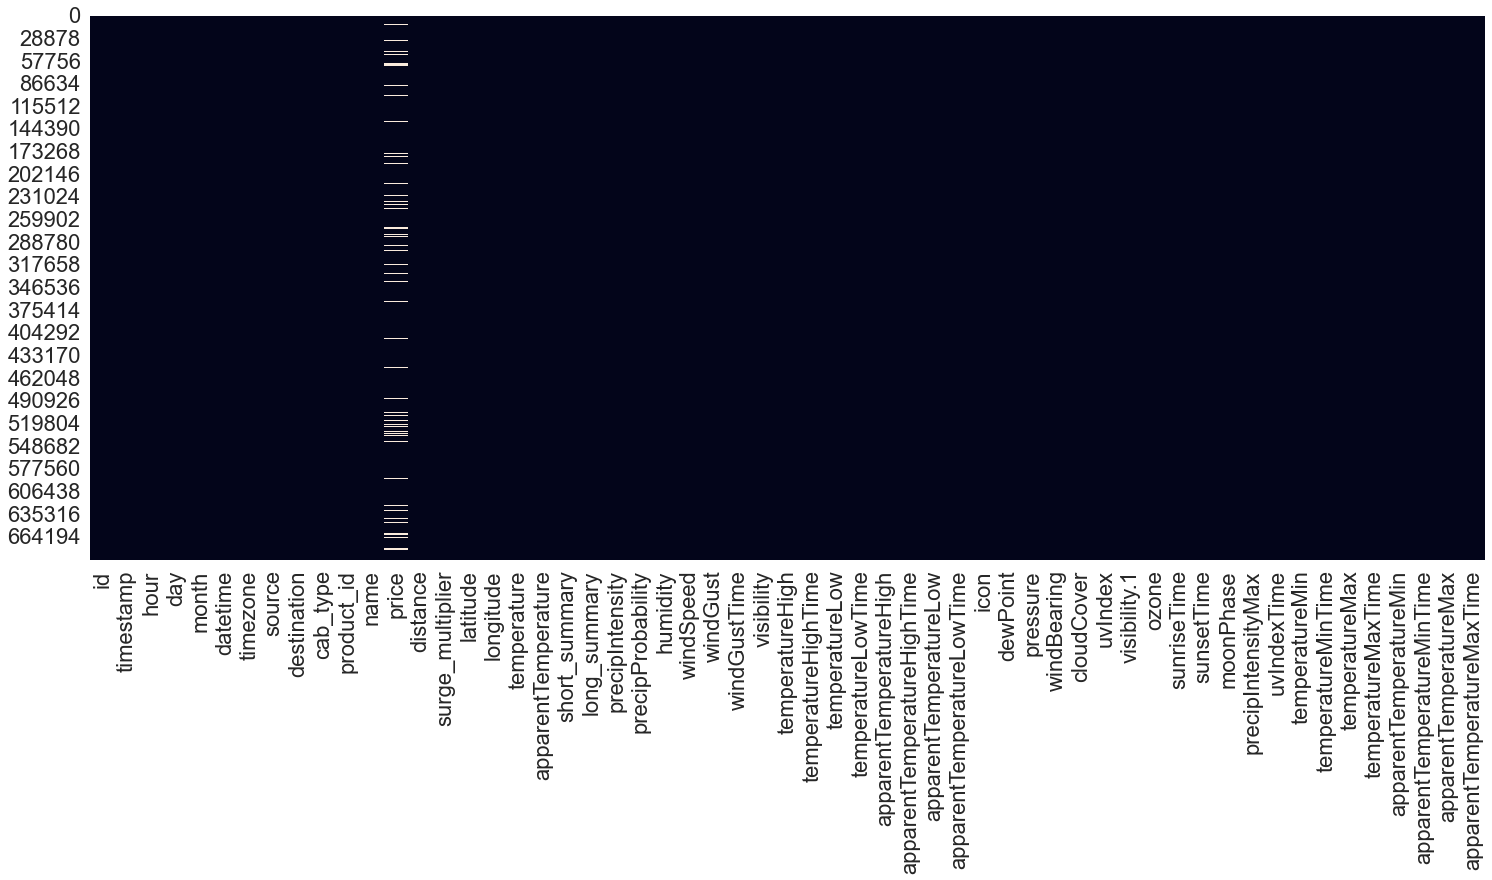

In [534]:
print(df.isnull().sum())
print("Total Missing Values :", df.isnull().sum().sum())

plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Dapat terlihat bahwa dataset yang digunakan memiliki 55095 missing value, maka perlu dilakukan filling pada kolom yang mengandung missing values.

In [535]:
df['price'] = df['price'].fillna(df['price'].mean())

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

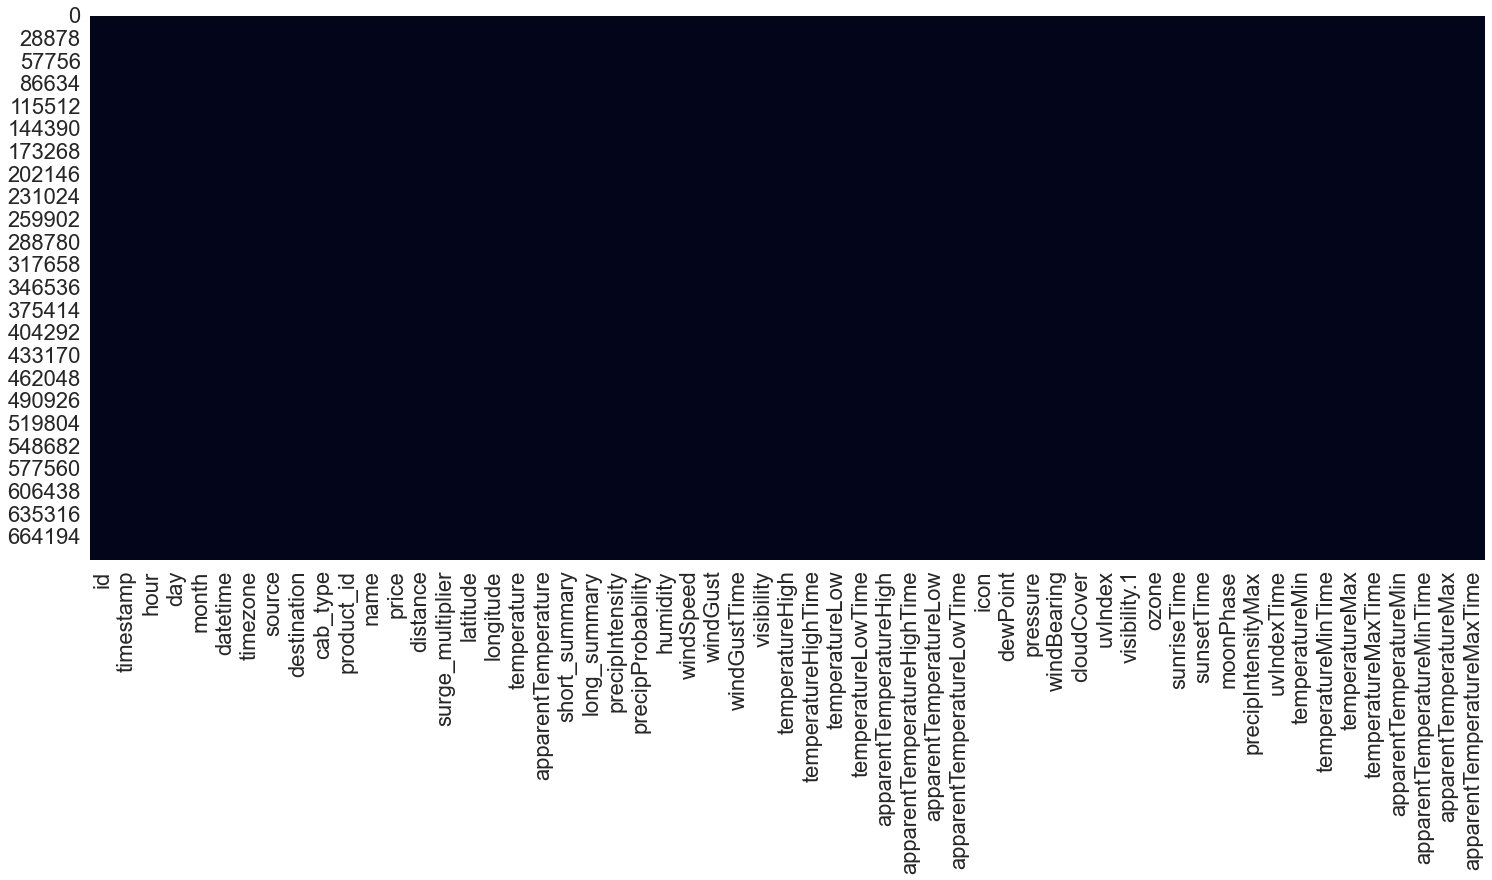

In [536]:
print(df.isnull().sum())
print("Total Missing Values :", df.isnull().sum().sum())

plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Duplikasi Kolom

Pada tahap ini dilakukan untuk melihat apakah terdapat lebih dari 1 kolom dengan values yang sama pada dataset

In [537]:
# check column visibility
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [538]:
# check column visibility.1
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [539]:
# drop column visibility.1
df = df.drop(['visibility.1'],axis=1)

# **DATA EXPLORATION**
---

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya

In [540]:
# data for data exploration
dfe = df.copy()

In [541]:
dfe.isnull().values.any()

False

In [542]:
dfe.describe(include='object')

id             datetime  \
count                                 693071               693071   
unique                                693071                31350   
top     424553bb-7174-41ea-aeb4-fe06d4f4b9d7  2018-11-26 23:21:14   
freq                                       1                  156   

                timezone              source         destination cab_type  \
count             693071              693071              693071   693071   
unique                 1                  12                  12        2   
top     America/New_York  Financial District  Financial District     Uber   
freq              693071               58857               58851   385663   

                                  product_id    name short_summary  \
count                                 693071  693071        693071   
unique                                    13      13             9   
top     6f72dfc5-27f1-42e8-84db-ccc7a75f6969  UberXL     Overcast    
freq                                   55096   55096        218895   

                               long_summary      icon  
count                                693071    693071  
unique                                   11         7  
top      Mostly cloudy throughout the day.    cloudy   
freq                                 202340    218895

In [543]:
dfe.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  693071.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         8.946069       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.500000       1.280000          1.000000      42.350300   
50%        16.000000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  apparentTemperature  precipIntensity  \
count  693071.000000  693071.000000        693071.000000    693071.000000   
mean      -71.066151      39.584388            35.881222         0.008922   
std         0.020302       6.726084             7.918707         0.026901   
min       -71.105400      18.910000            12.130000         0.000000   
25%       -71.081000      36.450000            31.910000         0.000000   
50%       -71.063100      40.490000            35.900000         0.000000   
75%       -71.054200      43.580000            40.080000         0.000000   
max       -71.033000      57.220000            57.220000         0.144700   

       precipProbability       humidity      windSpeed       windGust  \
count      693071.000000  693071.000000  693071.000000  693071.000000   
mean            0.146076       0.741119       6.186253       8.469860   
std             0.328938       0.138595       3.148223       5.289179   
min             0.000000       0.380000       0.450000       0.800000   
25%             0.000000       0.640000       3.410000       4.060000   
50%             0.000000       0.710000       5.910000       7.550000   
75%             0.000000       0.880000       8.410000      11.740000   
max             1.000000       0.960000      15.000000      27.250000   

       windGustTime     visibility  temperatureHigh  temperatureHighTime  \
count  6.930710e+05  693071.000000    693071.000000         6.930710e+05   
mean   1.544049e+09       8.467970        45.040982         1.544050e+09   
std    6.928244e+05       2.602888         5.996541         6.937921e+05   
min    1.543151e+09       0.717000        32.680000         1.543154e+09   
25%    1.543432e+09       8.432000        42.570000         1.543439e+09   
50%    1.543756e+09       9.880000        44.680000         1.543788e+09   
75%    1.544846e+09       9.996000        46.910000         1.544814e+09   
max    1.545127e+09      10.000000        57.870000         1.545160e+09   

       temperatureLow  temperatureLowTime  apparentTemperatureHigh  \
count   693071.000000        6.930710e+05            693071.000000   
mean        34.150736        1.544102e+09                41.614054   
std          6.383163        6.922923e+05                 7.666138   
min         17.850000        1.543234e+09                22.620000   
25%         30.170000        1.543489e+09                36.570000   
50%         34.180000        1.543817e+09                40.950000   
75%         38.730000        1.544836e+09                44.120000   
max         46.600000        1.545221e+09                57.200000   

       apparentTemperatureHighTime  apparentTemperatureLow  \
count             

In [544]:
# membagi menjadi 2 yaitu :
# fitur dengan nilai kategorikal
# fitur dengan nilai numerik
cate_col=[]
num_col=[]

for column in dfe.columns:
    if dfe[column].nunique() <=10:
        cate_col.append(column)
    else:
        num_col.append(column)

## Correlation Each Variabel Using Heatmap

<AxesSubplot: title={'center': 'Correlation Heatmap of Heart Failure Prediction'}>

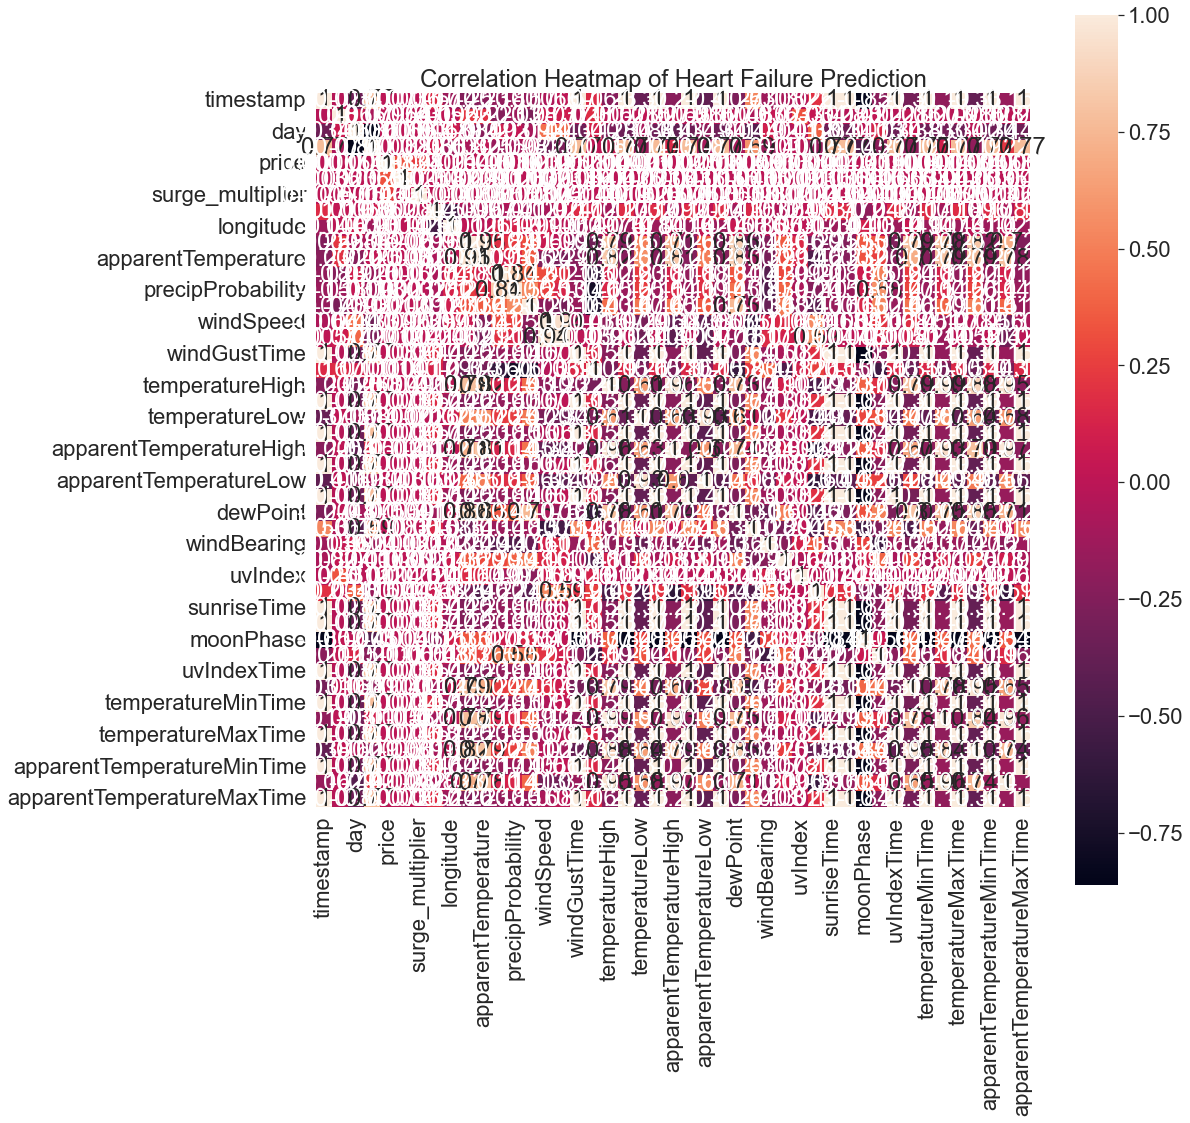

In [545]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction')
fig.set_size_inches((16,16))

sns.heatmap(dfe.corr(),
            square = True,
            annot = True)

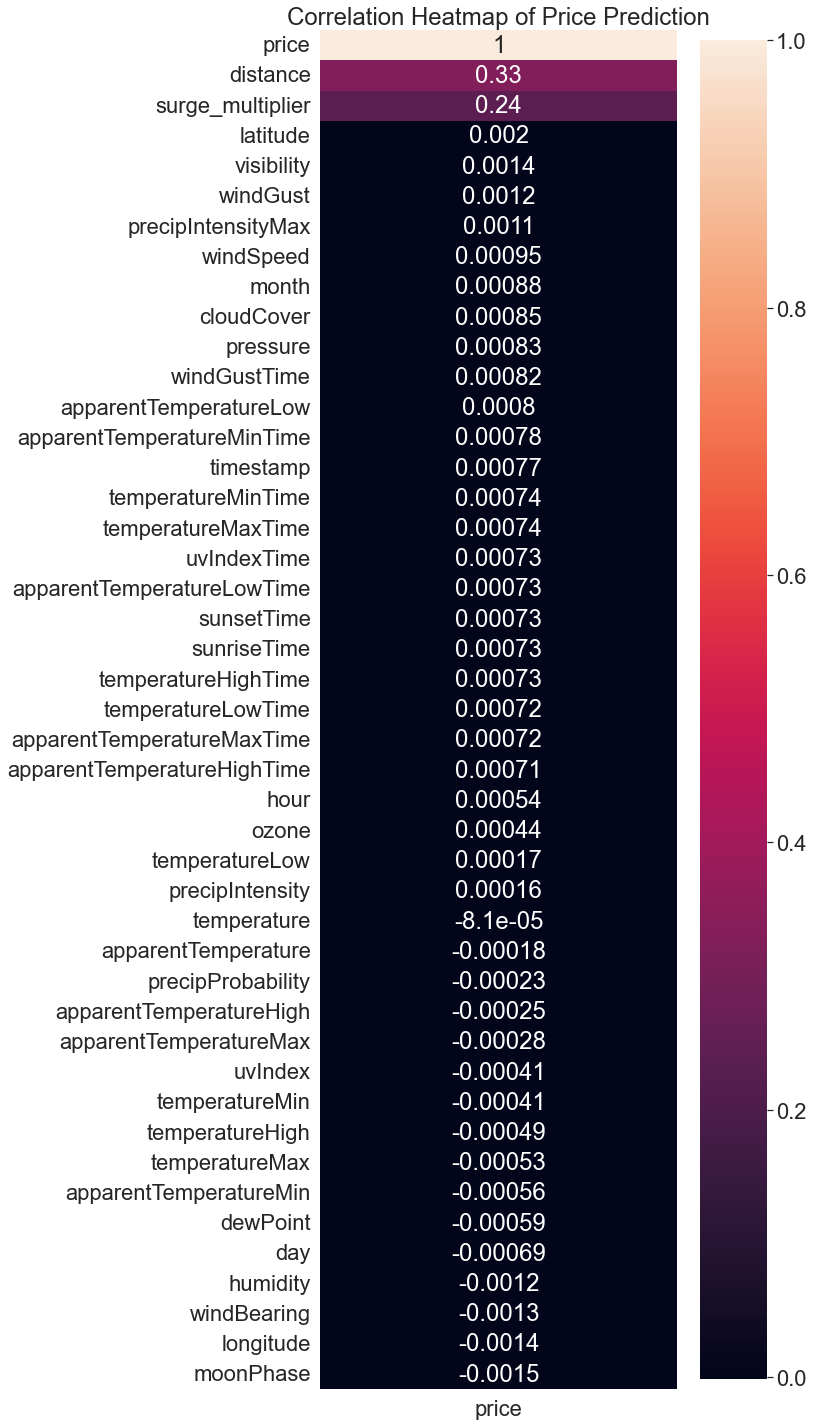

In [546]:
fig, ax = plt.subplots()
fig.set_size_inches((8,25))
sns.heatmap(dfe.corr()[['price']].sort_values(by='price', ascending=False),
                                                   annot = True)

plt.title('Correlation Heatmap of Price Prediction')
plt.show()

Dapat terlihat pada tabel di atas, bahwa nilai korelasi masing-masing variabel terhadap variabel price menunjukkan angka yang cukup kecil. Variabel yang memiliki korelasi yang cukup tinggi terhadap variabel price adalah distance dan variabel yang memiliki korelasi sangat rendah terhadap variabel price adalah variabel moonPhase

## Numerical Features

In [547]:
num_val = dfe.select_dtypes(include='number')
print(num_val.columns)

Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime',
       'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],
      dtype='object')


In [548]:
num_col = dfe.drop(['timestamp','datetime','windGustTime','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
                'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
                'sunriseTime','sunsetTime','precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax',
                'temperatureMaxTime','apparentTemperature','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax',
                'apparentTemperatureMaxTime','long_summary','icon','product_id','timezone','destination'],axis=1)

### Finding Outliers Numeric Features

In [549]:
num_col.columns

Index(['id', 'hour', 'day', 'month', 'source', 'cab_type', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase'],
      dtype='object')

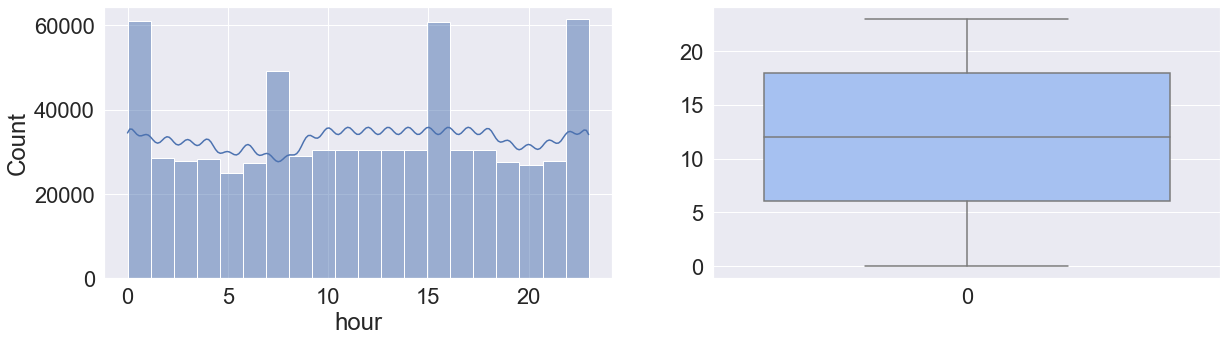

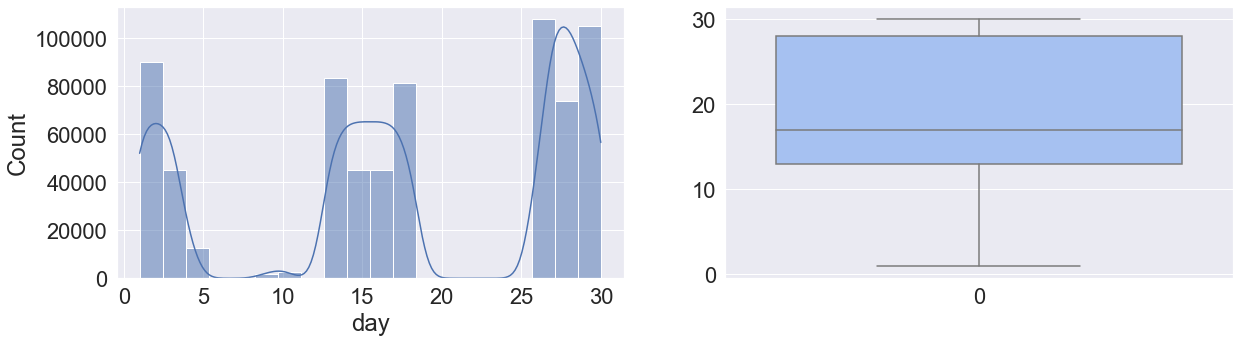

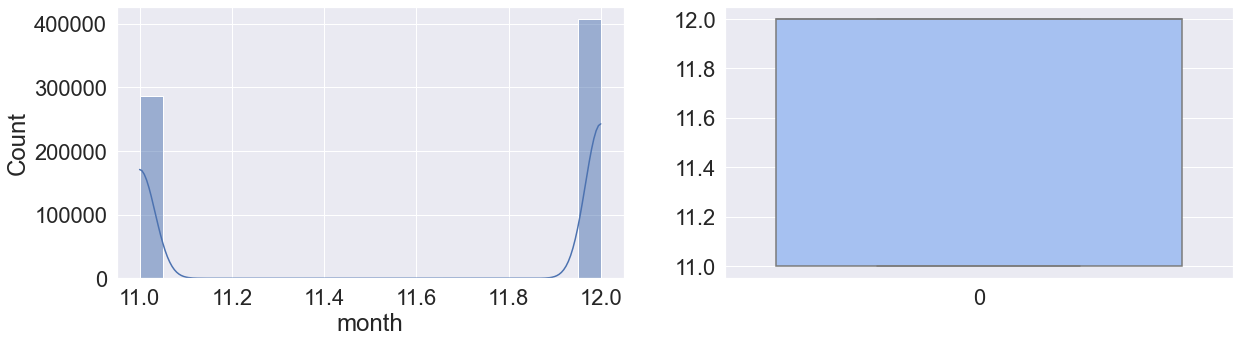

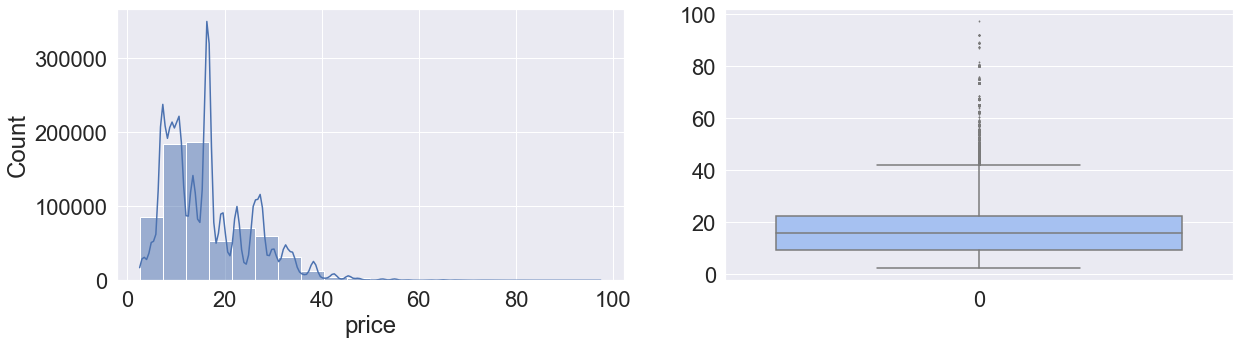

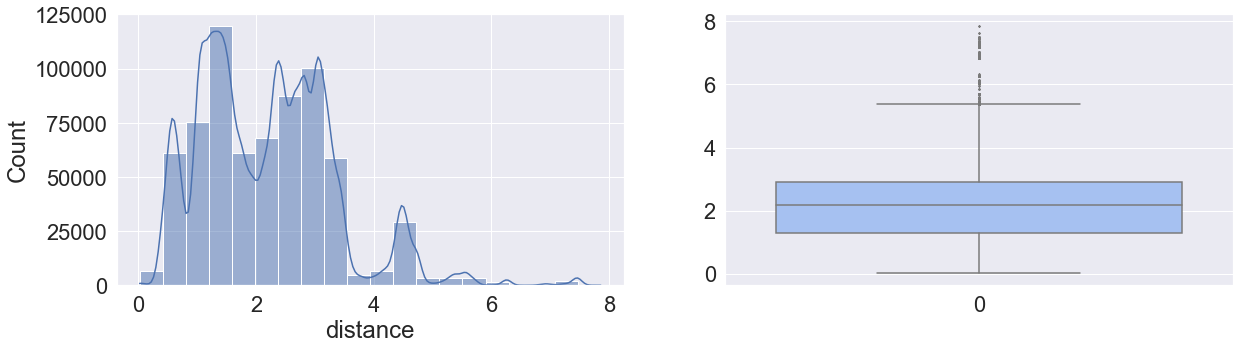

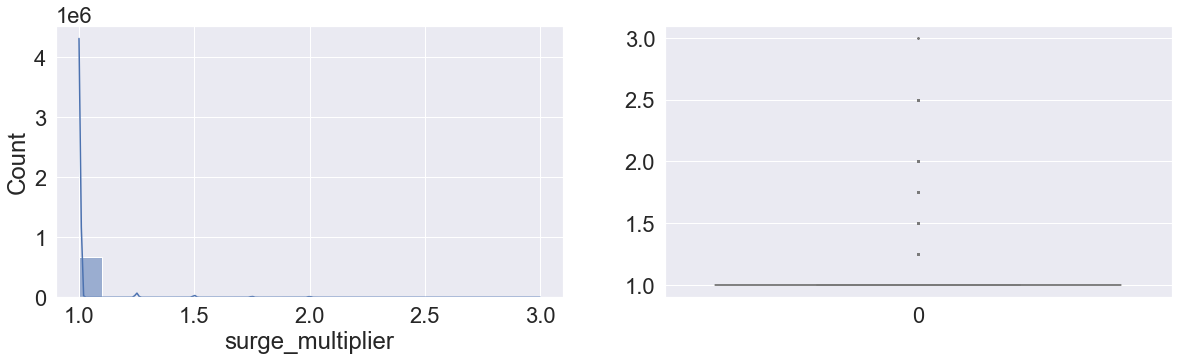

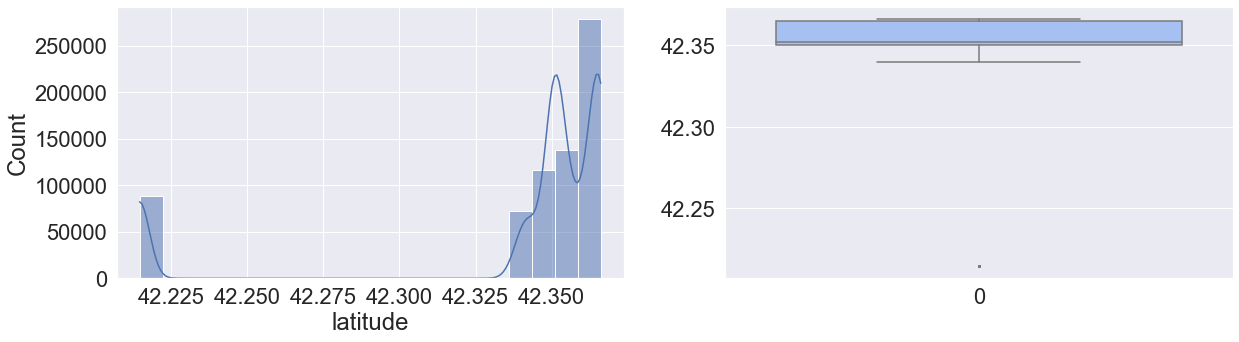

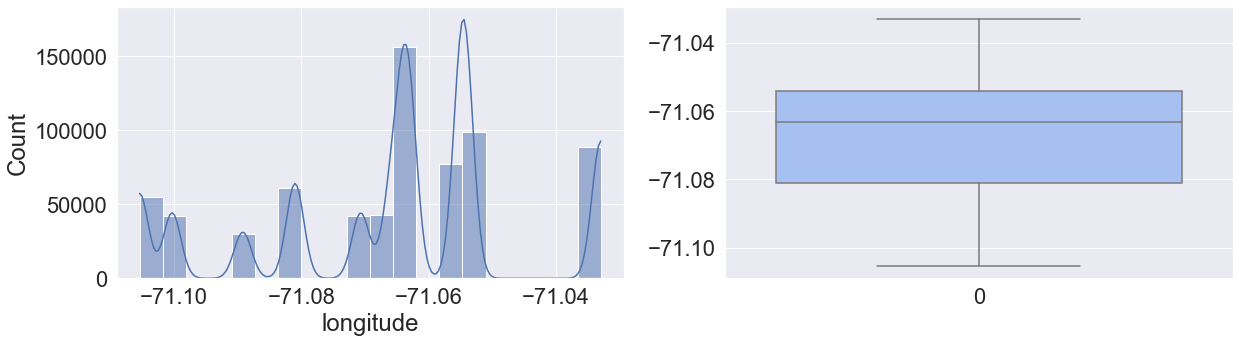

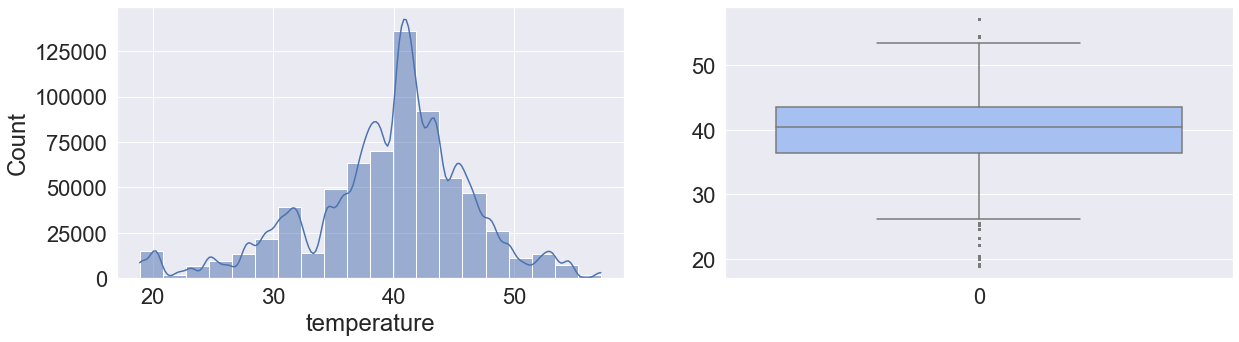

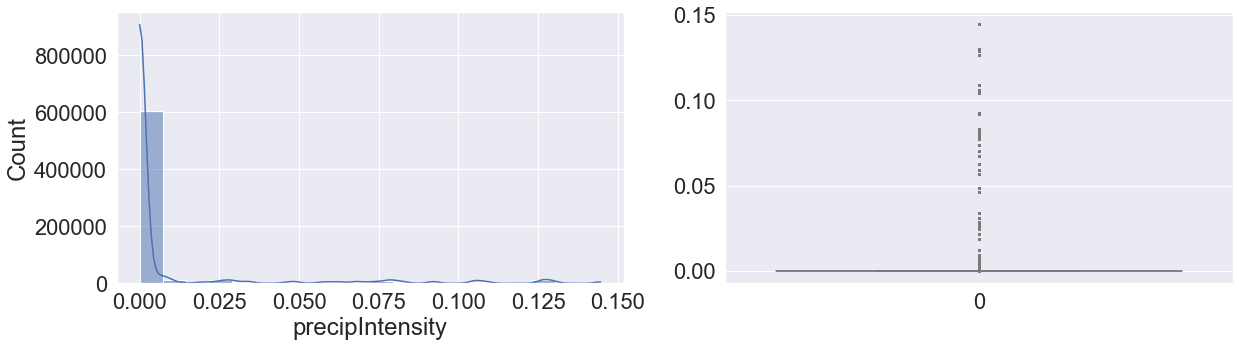

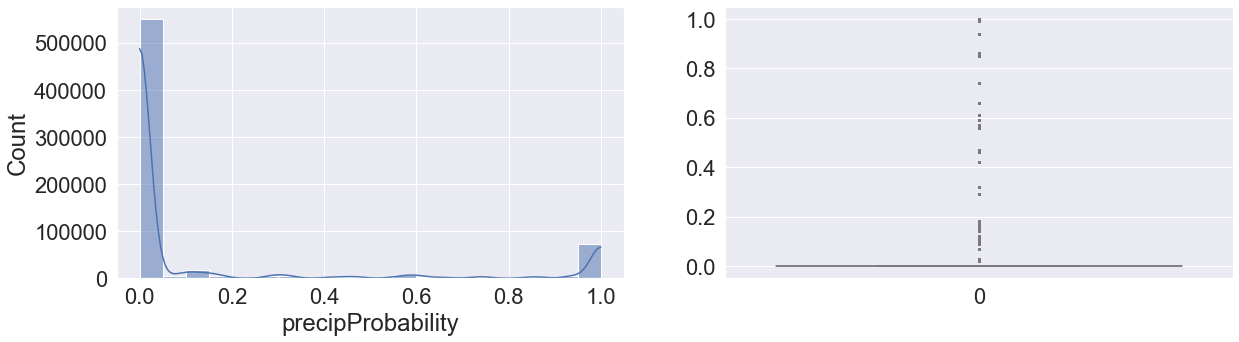

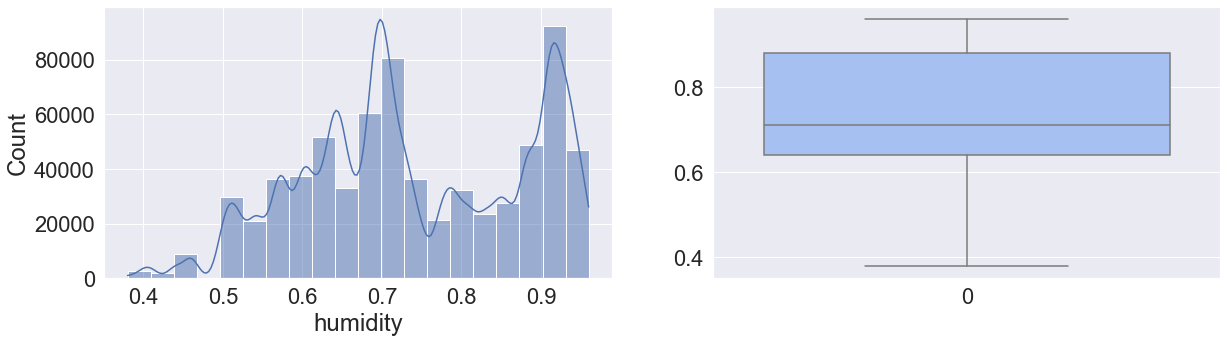

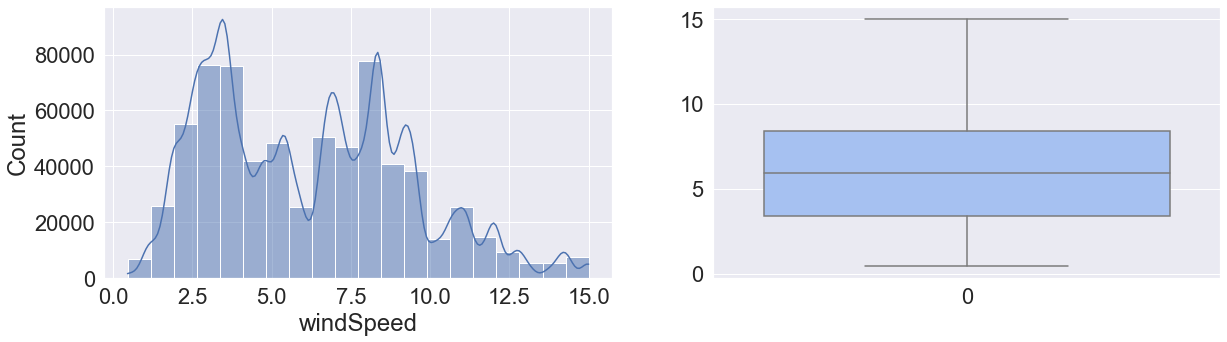

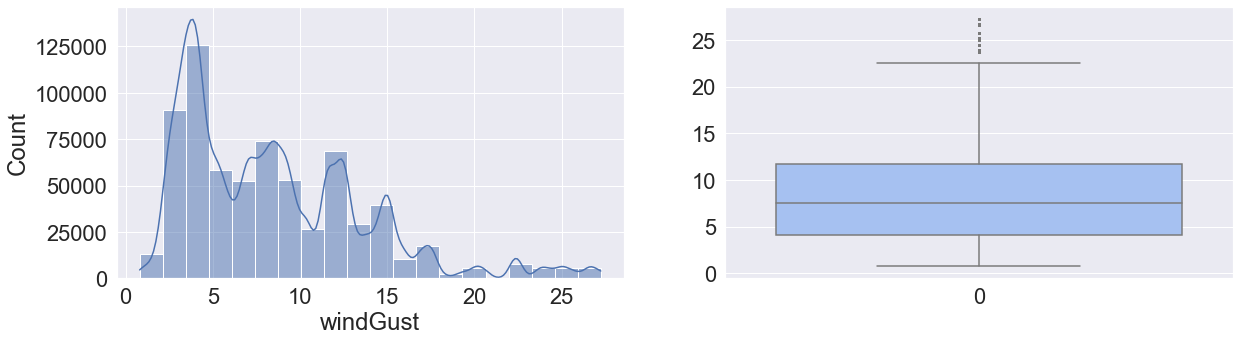

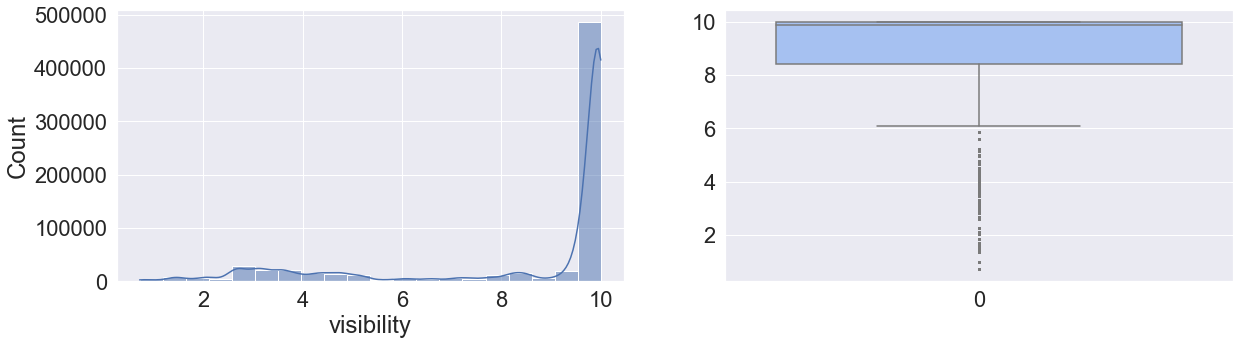

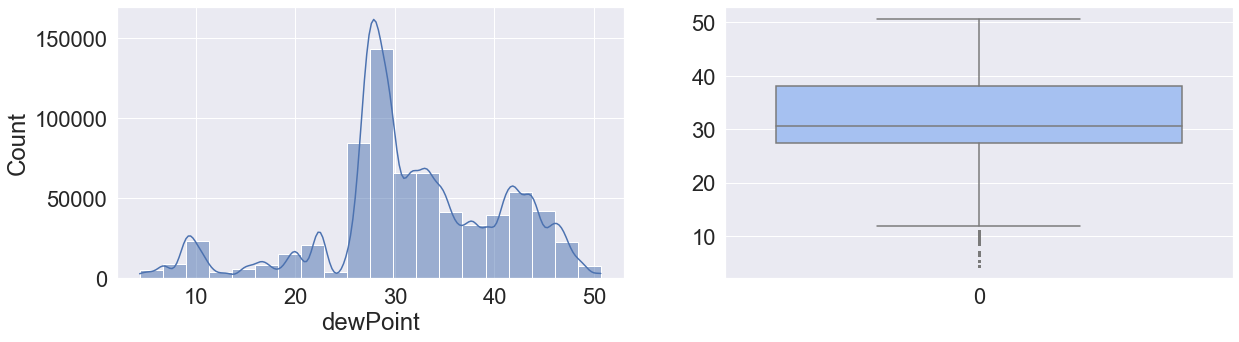

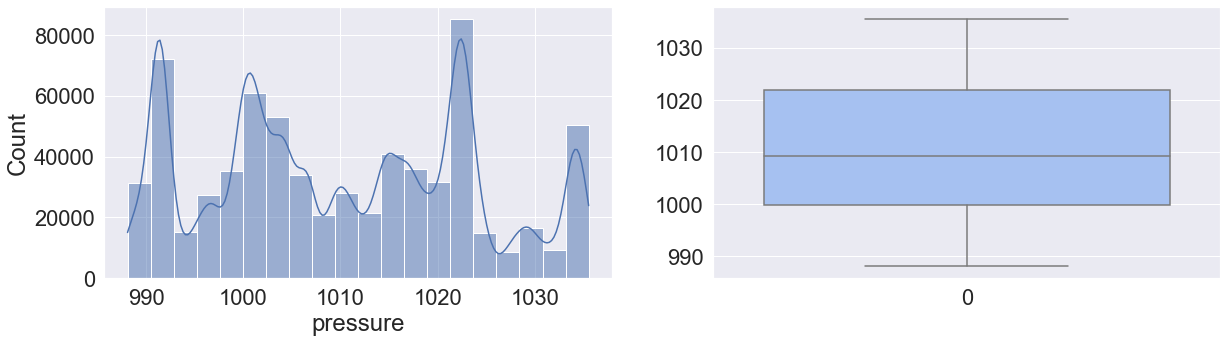

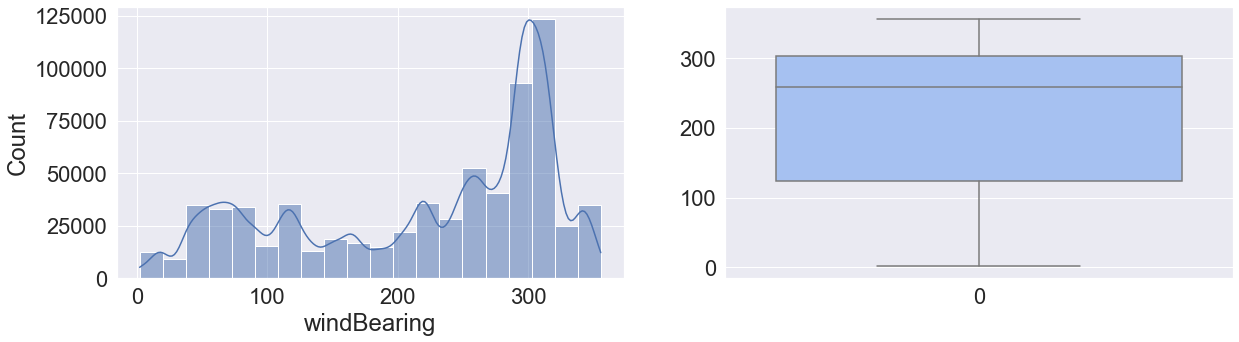

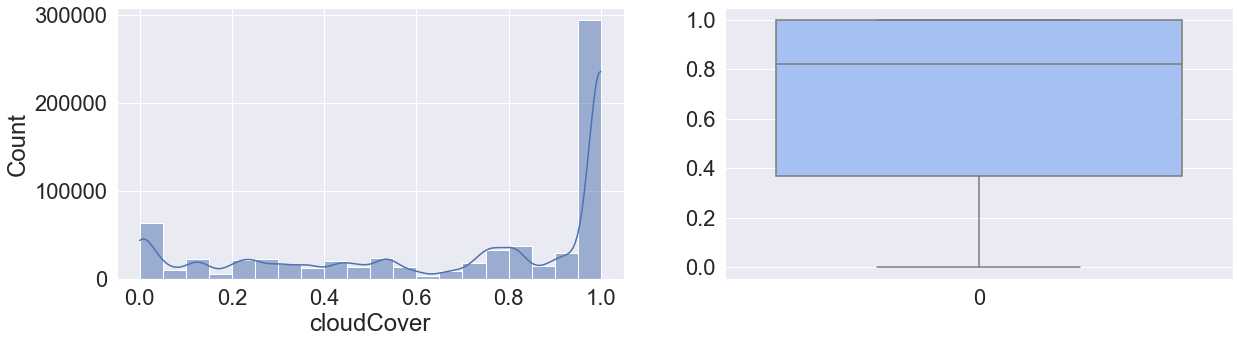

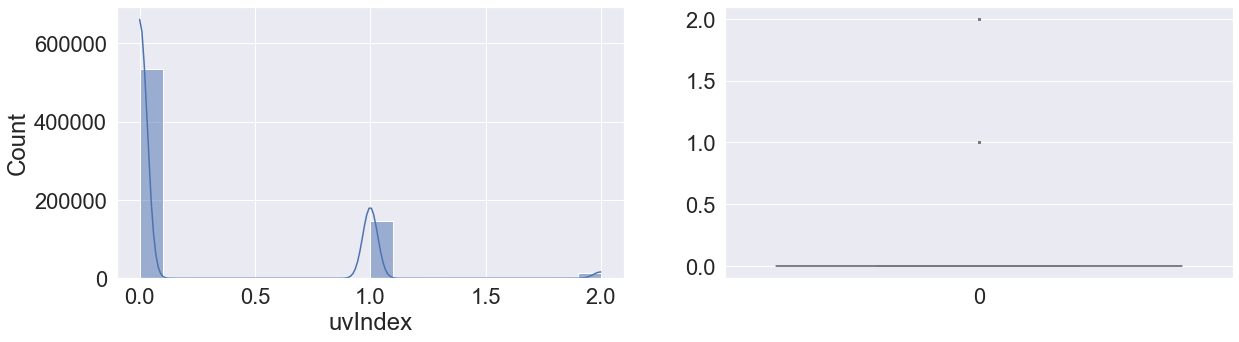

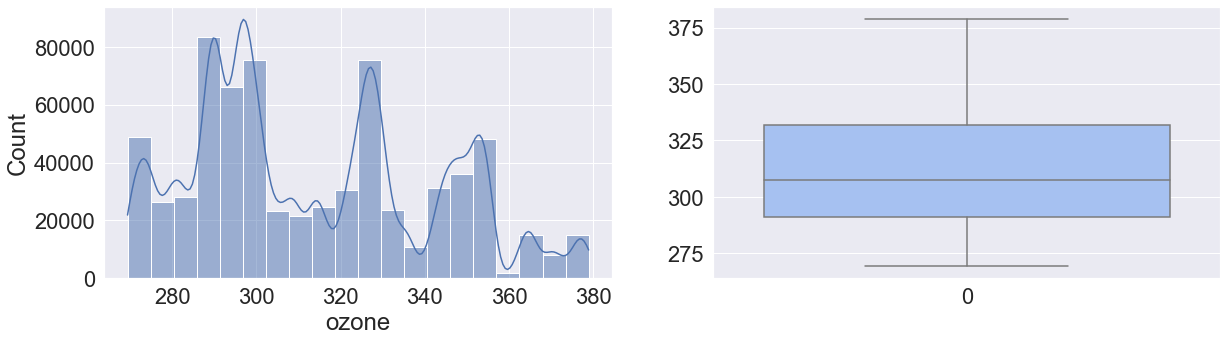

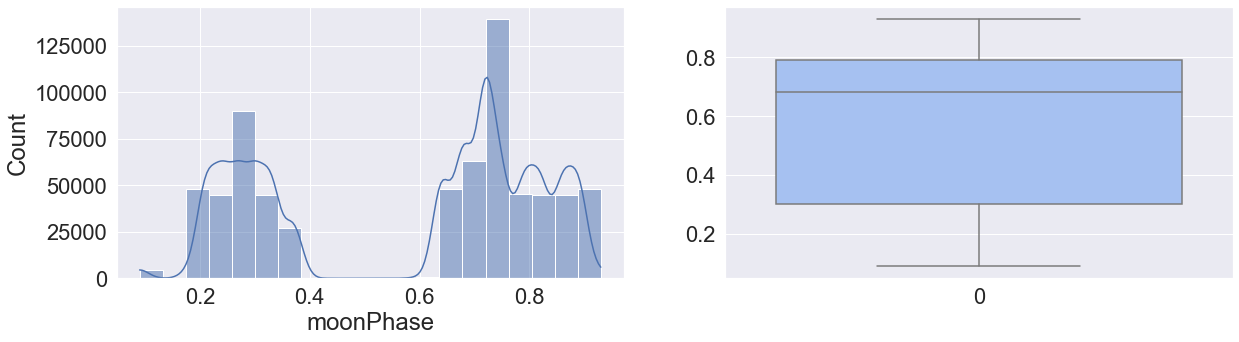

In [550]:
num_col = ['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(20, 5))

    sns.histplot(dfe[i],
                 bins=20,
                 kde=True,
                 ax=axs[0]);
    
    sns.boxplot(dfe[i],
                ax = axs[1],
                color='#99befd',
                fliersize=1);

Berdasarkan visualisasi di atas dapat diketahui bahwa hampir semua variabel memiliki outliers. Untuk itu kami akan melakukan penanganan pada fitur-fitur yang memiliki outliers

### Analisis Kolom Price

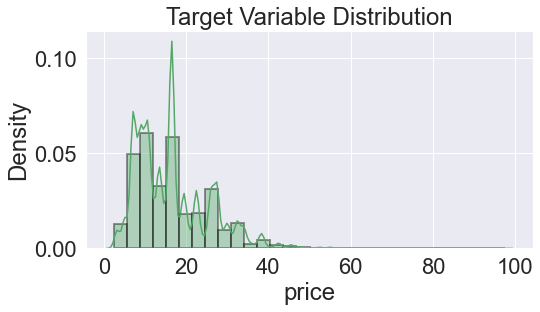

In [551]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(dfe['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

In [552]:
# checking the distribution of target variable
dfe['price'].value_counts()

16.545125    55095
7.000000     52314
16.500000    44351
10.500000    40590
13.500000    33707
9.000000     30884
27.500000    28221
19.500000    26591
22.500000    26568
26.000000    26226
9.500000     22738
11.000000    21419
8.500000     18270
7.500000     17951
5.000000     14084
8.000000     13885
16.000000    12654
15.000000    12470
32.500000    11496
11.500000    11044
34.000000     9792
30.000000     7685
10.000000     7069
14.000000     6269
13.000000     6225
12.000000     6206
17.000000     6122
12.500000     5601
3.000000      5543
38.500000     5540
6.500000      5390
3.500000      5063
20.500000     5027
27.000000     4950
18.500000     4936
26.500000     4846
17.500000     4576
29.500000     4103
30.500000     3701
21.500000     3676
23.000000     3628
25.000000     3524
18.000000     3264
24.000000     3254
28.500000     3159
38.000000     2811
31.500000     2686
15.500000     2647
42.500000     2393
5.500000      2260
35.000000     2148
22.000000     1992
33.000000   

### Analisis Kolom Month, Day, Hour

Sebelum kita mulai menganalisis waktu, kita akan membuat fungsi grouping berdasarkan kolom yang ada di dataframe. Lalu kita visualisasikan fungsi tersebut dengan banyaknya data tersebut muncul dalam data

In [553]:
def plot_bar(groupby_column):
    df1 = dfe.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame = df1,
                  x = groupby_column,
                  y = "counts",
                  color = groupby_column,
                  barmode = "group")
    print(df1)
    fig1.show()

#### Kolom month

Kita akan menganalisis bulan yang ada dalam data

In [554]:
plot_bar('month')

   month  counts
0     11  286457
1     12  406614


Analisis : Berdasarkan hasil dapat dilihat bahwa data month hanya memiliki fitur November dan Desember. Dengan kata lain, data ini diambil atau direkam pada bulan November dan Desember saja. Kita memiliki pesanan paling banyak pada bulan desember

#### Kolom day

Sekarang kita akan menganalisis hari dimana hari tersebut memiliki banyaknya pesanan taksi

In [555]:
# Sekali lagi, kita gunakan fungsi plot_bar(groupby_column)
plot_bar('day')

    day  counts
0     1   45240
1     2   44928
2     3   44928
3     4   12636
4     9    1674
5    10    2773
6    13   38531
7    14   44928
8    15   44928
9    16   44928
10   17   44928
11   18   36192
12   26   31587
13   27   76121
14   28   73691
15   29   59974
16   30   45084


Analisis : Berdasarkan hasil dapat dilihat bahwa kita memiliki banyak jarak pada data Day. Itu berarti kita tidak memiliki data selama hampir 13 hari. Dengan kata lain, tidak ada yang memesan taksi selama 13 hari. Frekuensi pesanan taksi yang paling tinggi ada pada hari ke-27

#### Kolom hour

Sekarang kita akan menganalisis berapa banyak durasi taksi beroperasi dalam hitungan jam

In [556]:
# Gunakan fungsi plot_bar(groupby_column)
plot_bar('hour')

    hour  counts
0      0   32413
1      1   28548
2      2   28548
3      3   27815
4      4   28330
5      5   25008
6      6   27336
7      7   24936
8      8   24275
9      9   28971
10    10   30384
11    11   30384
12    12   30384
13    13   30384
14    14   30384
15    15   30383
16    16   30384
17    17   30384
18    18   30384
19    19   27555
20    20   26782
21    21   27732
22    22   29436
23    23   31931


Analisis : Berdasarkan hasil yang didapat bahwa kita memiliki hampir 24 jam data rekaman per hari.

## Categorical Features

In [557]:
cat_col = dfe.select_dtypes(include='object')
cat_col.head(1)

id             datetime  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  2018-12-16 09:30:07   

           timezone            source    destination cab_type product_id  \
0  America/New_York  Haymarket Square  North Station     Lyft  lyft_line   

     name    short_summary                long_summary                   icon  
0  Shared   Mostly Cloudy    Rain throughout the day.    partly-cloudy-night

### Analisis Source dan Destination

In [558]:
source = pd.DataFrame(dfe.groupby('source').size().reset_index())
source.columns = ['source','number_of_cabs']
print(source)

                     source  number_of_cabs
0                  Back Bay           57792
1               Beacon Hill           57403
2         Boston University           57764
3                    Fenway           57757
4        Financial District           58857
5          Haymarket Square           57736
6                 North End           57763
7             North Station           57118
8   Northeastern University           57756
9             South Station           57750
10         Theatre District           57813
11                 West End           57562


Analisis : Jumlah taksi yang tersedia di Financial District adalah yang tertinggi. Tidak ada perbedaan yang signifikan pada ketersediaan taksi pada setiap tempat asal

Kita akan menganalisis tempat tujuan dan tempat asal berdasarkan koordinatnya

Berbeda dengan pengelompokkan sebelumnya, sekarang kita akan mengelompokkan data destination dan source berdasarkan latitude dan longitude

In [559]:
dfe

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type                            product_id  \
0       North Station     Lyft                             lyft_line   
1       North Station     Lyft                          lyft_premier   
2       North Station     Lyft                                  lyft   
3       North Station     Lyft                           lyft_luxsuv   
4       North Station     Lyft                             lyft_plus   
...               ...      ...                                   ...   
693066      North End     Uber  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   
693067      North End     Uber  55c66225-fbe7-4fd5-9072-eab1ece5e23e   
693068      North End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   
693069      North End     Uber  6d318bcc-22a3-4af6-bddd-b409bfce1546   
693070      North End     Uber  997acbb5-e102-41e1-b155-9df7de0a73f2   

                name      price  distance  surge_multiplier  latitude  \
0             Shared   5.000000      0.44               1.0   42.2148   
1                Lux  11.000000      0.44               1.0   42.2148   
2               Lyft   7.000000      0.44               1.0   42.2148   
3       Lux Black XL  26.000000      0.44               1.0   42.2148   
4            Lyft XL   9.000000      0.44               1.0   42.2148   
...              ...        ...       ...               ...       ...   
693066        UberXL  13.000000      1.00               1.0   42.3519   
693067         UberX   9.500000      1.00               1.0   42.3519   
693068          Taxi  16.545125      1.00               1.0   42.3519   
693069     Black SUV  27.000000      1.00               1.0   42.3519   
693070      UberPool  10.000000      1.00               1.0   42.3519   

        longitude  temperature  apparentTemperature    short_summary  \
0        -71.0330        42.34                37.12   Mostly Cloudy    
1        -71.0330        43.58                37.35            Rain    
2        -71.0330        38.33                32.93           Clear    
3        -71.0330        34.38                29.63           Clear    
4        -71.0330        37.44                30.88   Partly Cloudy    
...           ...          ...                  ...              ...   
693066   -71.0643        37.05

In [560]:
dfe.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336904 -71.066127
                        Fenway                   42.337840 -71.065812
                        Haymarket Square         42.337070 -71.065139
                        North End                42.338142 -71.066312
                        Northeastern University  42.336810 -71.065419
                        South Station            42.338708 -71.065868
Beacon Hill             Boston University        42.336827 -71.065784
                        Fenway                   42.338942 -71.065757
                        Haymarket Square         42.337337 -71.066054
                        North End                42.338300 -71.065758
                        Northeastern University  42.337259 -71.066089
                        South Station            42.336336 -71.065756
Boston University       Back Bay                 42.337040 -71.065862
                        Beacon Hill              42.339274 -71.066565
                        Financial District       42.339265 -71.066437
                        North Station            42.338337 -71.066188
                        Theatre District         42.338153 -71.066309
                        West End                 42.337502 -71.066244
Fenway                  Back Bay                 42.340084 -71.065859
                        Beacon Hill              42.337819 -71.065550
                        Financial District       42.337213 -71.066292
                        North Station            42.339619 -71.066417
                        Theatre District         42.336492 -71.065439
                        West End                 42.338371 -71.066403
Financial District      Boston University        42.338785 -71.066623
                        Fenway                   42.336937 -71.066036
                        Haymarket Square         42.337749 -71.065840
                        North End                42.338370 -71.065965
                        Northeastern University  42.338274 -71.065928
                        South Station            42.339069 -71.067014
Haymarket Square        Back Bay                 42.339737 -71.066502
                        Beacon Hill              42.337270 -71.066110
                        Financial District       42.337317 -71.066231
                        North Station            42.338259 -71.066023
                        Theatre District         42.338200 -71.065636
                        West End                 42.339017 -71.066281
North End               Back Bay                 42.338519 -71.066157
                        Beacon Hill              42.336807 -71.066220
                        Financial District       42.337784 -71.066134
                        North Station            42.339405 -71.066966
                        Theatre District         42.338820 -71.066752
                        West End                 42.338681 -71.065944
North Station           Boston University        42.338988 -71.066380
                        Fenway                   42.338702 -71.066604
                        Haymarket Square         42.337224 -71.066276
                        North End                42.337599 -71.065857
                        Northeastern University  42.337931 -71.066444
                        South Station            42.336529 -71.065391
Northeastern University Back Bay                 42.338963 -71.066267
                        Beacon Hill              42.338977 -71.065579
                        Financial District       42.337793 -71.066068
                        North Station            42.339839 -71.066534
                        Theatre District         42.338406 -71.065493
                        West End                 42.336766 -71.066227
South Station           Back Bay                 42.338814 -71.065902
                        Beacon Hill              42.338938 -

Kita akan membuat peta geospasial untuk memvisualisasikan data yang tempat asalnya di Haymarket Square. Kita akan memplot menggunakan cluster bukan marker. Peta yang dirender oleh folium bersifat interaktif, kita dapat menggeser, menarik, dan memperbesar/memperkecil peta

In [561]:
# import pustaka yang dibutuhkan untuk membuat peta geospasial
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

# memfilter titik keberangkatan Haymarket Square
df1 = dfe[dfe['source']=='Haymarket Square']

# membuat folium map dengan zoom 10
my_map = folium.Map(location=[df1["latitude"].mean(),
                              df1["longitude"].mean()],
                    zoom_start = 10)

# membuat cluster berdasarkan latitude dan longitude
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),
                                   color='green'))
my_map

Analisis : Berdasarkan peta geospasial di atas kita dapat melihat bahwa perjalanan dengan tempat asal Haymarket Square memiliki dua cluster tujuan yang berisi banyak tempat. Untuk melihatnya kita bisa memperbesar peta. Sebagian besar berada di area Boston sebanyak 46256 data pada cluster tersebut.

### Analisis Uber dan Lyft

Selanjutnya kita akan mencari tahu jumlah taksi Lyft dan Uber

In [562]:
# kita akan gunakan fungsi plot_bar(groupby_column)
plot_bar('cab_type')

  cab_type  counts
0     Lyft  307408
1     Uber  385663


Analisis : Berdasarkan hasil didapat bahwa kita memiliki data uber lebih banyak dibandingkan dengan data lyft. Perbedaannya tidak terlalu besar, masing-masing memiliki sekitar 300.000 data.

In [563]:
dfe.groupby(by=["cab_type", "name"]).cab_type.agg(["count"])

count
cab_type name               
Lyft     Lux           51235
         Lux Black     51235
         Lux Black XL  51235
         Lyft          51235
         Lyft XL       51235
         Shared        51233
Uber     Black         55095
         Black SUV     55096
         Taxi          55095
         UberPool      55091
         UberX         55094
         UberXL        55096
         WAV           55096

In [564]:
df2a = dfe.groupby(by=['cab_type',"name"]).size().reset_index(name="counts")
# tampilkan df2 dalam bentuk barplot
fig2a = px.bar(data_frame=df2a,
              x="cab_type",
              y="counts",
              color="name",
              barmode="group")
fig2a.show()

Kita akan menganalisis jumlah taksi yang beroperasi pada hari-hari tertentu

In [565]:
# grouping berdasarkan day dan cab_type
df2 = dfe.groupby(by=['day',"cab_type"]).size().reset_index(name="counts")

# tampilkan df2 dalam bentuk barplot
fig2 = px.bar(data_frame=df2,
              x="day",
              y="counts",
              color="cab_type",
              barmode="group")
fig2.show()

Analisis : Berdasarkan hasil didapat bahwa kedua jasa layanan transportasi memiliki frekuensi pemesanan paling tinggi di antara hari ke-25 sampai hari ke-30 yaitu lebih tepatnya pada saat akhir bulan.

Mari kita mencari tahu jasa layanan transportasi mana yang memiliki durasi paling lama saat beroperasi

In [566]:
dfe.groupby(by=["hour","cab_type"]).cab_type.agg(["count"])

count
hour cab_type       
0    Lyft      14657
     Uber      17756
1    Lyft      12669
     Uber      15879
2    Lyft      12548
     Uber      16000
3    Lyft      12224
     Uber      15591
4    Lyft      12502
     Uber      15828
5    Lyft      11155
     Uber      13853
6    Lyft      11935
     Uber      15401
7    Lyft      11024
     Uber      13912
8    Lyft      10700
     Uber      13575
9    Lyft      12948
     Uber      16023
10   Lyft      13325
     Uber      17059
11   Lyft      13372
     Uber      17012
12   Lyft      13633
     Uber      16751
13   Lyft      13503
     Uber      16881
14   Lyft      13306
     Uber      17078
15   Lyft      13394
     Uber      16989
16   Lyft      13349
     Uber      17035
17   Lyft      13853
     Uber      16531
18   Lyft      13404
     Uber      16980
19   Lyft      12461
     Uber      15094
20   Lyft      11715
     Uber      15067
21   Lyft      12480
     Uber      15252
22   Lyft      13247
     Uber      16189
23   Lyft      14004
     Uber      17927

In [567]:
df3 = dfe.groupby(["hour","cab_type"]).size().reset_index(name="counts")

fig3 = px.bar(data_frame = df3,
              x = "hour",
              y = "counts",
              color = "cab_type",
              barmode = "group")
fig3.show()

Jadi satu hal yang sangat jelas dalam aspek ini bahwa uber jauh di depan lyft dalam mendapatkan pesanan di semua aspek waktu.

## Categorical & Numeric Features

### Analisis Tarif Uber dan Lyft

In [568]:
# Which cabs have higher average prices?
dfe.groupby(by=["cab_type"]).price.agg(["mean"])

mean
cab_type           
Lyft      17.351396
Uber      15.902455

In [569]:
# Which cabs had the highest average prices?
dfe.groupby(by=["name","cab_type"])['price'].mean().sort_values(ascending=False)

name          cab_type
Lux Black XL  Lyft        32.324086
Black SUV     Uber        30.286763
Lux Black     Lyft        23.062468
Black         Uber        20.523786
Lux           Lyft        17.771240
Taxi          Uber        16.545125
UberXL        Uber        15.678144
Lyft XL       Lyft        15.309363
UberX         Uber         9.765074
WAV           Uber         9.765019
Lyft          Lyft         9.610885
UberPool      Uber         8.752500
Shared        Lyft         6.029893
Name: price, dtype: float64

### Analisis Pengaruh Waktu dan Cab_type Terhadap Tarif

In [570]:
# Most expensive hour for Lyft
df5 = dfe[dfe['cab_type'] == 'Lyft']
df5 = df5.groupby(by=["hour","cab_type"]).price.mean().sort_values(ascending=False)
df5

hour  cab_type
11    Lyft        17.500337
0     Lyft        17.450058
22    Lyft        17.444252
8     Lyft        17.402991
20    Lyft        17.389287
19    Lyft        17.384715
17    Lyft        17.375117
4     Lyft        17.366701
14    Lyft        17.363032
16    Lyft        17.361439
13    Lyft        17.353973
3     Lyft        17.352381
15    Lyft        17.337390
21    Lyft        17.333642
5     Lyft        17.332792
12    Lyft        17.326157
2     Lyft        17.324821
7     Lyft        17.315947
1     Lyft        17.311035
10    Lyft        17.309118
23    Lyft        17.304949
6     Lyft        17.282279
9     Lyft        17.260774
18    Lyft        17.237541
Name: price, dtype: float64

In [571]:
# Most expensive hour for Uber
df6 = dfe[dfe['cab_type'] == 'Uber']
df6 = df6.groupby(by=["hour","cab_type"]).price.mean().sort_values(ascending=False)
df6

hour  cab_type
21    Uber        15.999083
20    Uber        15.977140
8     Uber        15.964711
2     Uber        15.961088
17    Uber        15.956367
4     Uber        15.952616
18    Uber        15.951971
6     Uber        15.931743
14    Uber        15.915661
9     Uber        15.912638
13    Uber        15.905789
3     Uber        15.903349
5     Uber        15.897736
22    Uber        15.893460
15    Uber        15.887191
1     Uber        15.882108
23    Uber        15.879469
10    Uber        15.876181
19    Uber        15.864303
16    Uber        15.854320
0     Uber        15.848004
7     Uber        15.846142
11    Uber        15.816278
12    Uber        15.809791
Name: price, dtype: float64

### Analisis Pengaruh Rute dan Cab_type Terhadap Tarif

Kita akan menganalisis rata-rata harga tiap rute yang pernah dilalui oleh Uber dan Lyft

In [572]:
pd.set_option('display.max_rows', 150)
dfe.groupby(by=["cab_type","source","destination"]).price.agg(["mean"])

mean
cab_type source                  destination                       
Lyft     Back Bay                Boston University        14.930956
                                 Fenway                   14.528965
                                 Haymarket Square         18.874528
                                 North End                20.485598
                                 Northeastern University  13.742901
                                 South Station            16.517992
         Beacon Hill             Boston University        17.171791
                                 Fenway                   17.032381
                                 Haymarket Square         13.977477
                                 North End                15.904521
                                 Northeastern University  17.591353
                                 South Station            16.754048
         Boston University       Back Bay                 14.667988
                                 Beacon Hill              18.191313
                                 Financial District       25.728210
                                 North Station            21.674468
                                 Theatre District         19.979053
                                 West End                 20.016940
         Fenway                  Back Bay                 14.511159
                                 Beacon Hill              17.604048
                                 Financial District       25.505895
                                 North Station            21.372432
                                 Theatre District         19.629916
                                 West End                 19.340728
         Financial District      Boston University        26.747218
                                 Fenway                   24.973185
                                 Haymarket Square         13.403729
                                 North End                13.450265
                                 Northeastern University  22.059573
                                 South Station            12.599438
         Haymarket Square        Back Bay                 17.513692
                                 Beacon Hill              13.363205
                                 Financial District       12.804261
                                 North Station            12.430227
                                 Theatre District         13.832289
                                 West End                 12.523313
         North End               Back Bay                 20.349055
                                 Beacon Hill              16.542735
                                 Financial District       13.539138
                                 North Station            13.069742
                                 Theatre District         15.856475
                                 West End                 13.854380
         North Station           Boston University        19.844917
                                 Fenway                   19.311391
                                 Haymarket Square         12.803894
                                 North End                13.415951
                                 Northeastern University  20.488717
                                 South Station            15.847284
         Northeastern University Back Bay                 13.974566
                                 Beacon Hill              17.411785
                                 Financial District       24.138387
                                 North Station            21.452045
                                 Theatre District         17.502468
                                 West End                 19.615140
         South Station           Back Bay                 20.047230
                                 Beacon Hill              18.230357
                                 Financial District       12.759295
                                 North Station     

Kemudian cari tahu harga maksimum dari semua rute

In [573]:
pd.set_option('display.max_columns', 60)
print('Maximum price in our data :',dfe.price.max())
dfe[dfe['price']==dfe.price.max()]

Maximum price in our data : 97.5


id     timestamp  hour  day  month  \
597071  ba1593a1-e4fd-4c7a-a011-e2d4fccbf081  1.543714e+09     1    2     12   

                   datetime          timezone              source destination  \
597071  2018-12-02 01:28:02  America/New_York  Financial District      Fenway   

       cab_type   product_id          name  price  distance  surge_multiplier  \
597071     Lyft  lyft_luxsuv  Lux Black XL   97.5      4.43               2.0   

        latitude  longitude  temperature  apparentTemperature short_summary  \
597071   42.3503    -71.081        35.52                35.52        Clear    

                                      long_summary  precipIntensity  \
597071   Light rain in the morning and overnight.               0.0   

        precipProbability  humidity  windSpeed  windGust  windGustTime  \
597071                0.0      0.82       1.85      2.37    1543672800   

        visibility  temperatureHigh  temperatureHighTime  temperatureLow  \
597071       9.846            44.65           1543690800           34.88   

        temperatureLowTime  apparentTemperatureHigh  \
597071          1543712400                    43.98   

        apparentTemperatureHighTime  apparentTemperatureLow  \
597071                   1543690800                   35.53   

        apparentTemperatureLowTime           icon  dewPoint  pressure  \
597071                  1543712400   clear-night      30.46   1023.52   

        windBearing  cloudCover  uvIndex  ozone  sunriseTime  sunsetTime  \
597071          146        0.12        0  274.6   1543665335  1543698860   

        moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
597071       0.82                 0.0   1543683600           31.57   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
597071          1543665600           44.65          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
597071                    28.1                  1543658400   

        apparentTemperatureMax  apparentTemperatureMaxTime  
597071                   43.98                  1543690800

In [574]:
dfe[dfe['price']==dfe.price.max()][['latitude','longitude']]

latitude  longitude
597071   42.3503    -71.081

Analisis : Kita memiliki harga tertinggi sebanyak 97.5 dolar dari rute Financial District menuju ke Fenway.

Untuk mengetahui seberapa jauh rute ini, kita akan memplot peta dari kedua tempat tersebut menggunakan folium map.

In [575]:
# membuat peta folium
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)

# buat marker titik tujuan
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway

# buat marker titik keberangkatan
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

Analisis : Sepertinya jarak diantara kedua tempat tersebut tidak terlalu jauh. Dengan kata lain, kedua tempat tersebut masih berada dalam wilayah Boston bukan di luar Boston. Jadi kemungkinannya ada outlier karena kita tidak memiliki informasi mengenai durasi perjalanan rute tersebut. Oleh karena itu, kita harus mengecek data lainnya dengan rute yang sama.

In [576]:
df_group = dfe.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()

df_group[(df_group['source']=='Financial District') & (df_group['destination']=='Fenway')]

source destination       mean
25  Financial District      Fenway  22.862157

Rata-rata harga dari rute yang sama sebanyak 23.4 dolar yang mana jauh dari data harga maksimum yaitu 97.5 dolar. Maka kemungkinan itu adalah outlier. Lalu kita akan menghapusnya

In [577]:
# filtering harga yang bukan harga maksimum
dfe = dfe.loc[df['price']!=dfe.price.max()]

In [578]:
dfe.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [579]:
dfe.groupby(by=["distance","price"]).price.agg(["mean"])

mean
distance price               
0.02     5.500000    5.500000
         6.500000    6.500000
         7.500000    7.500000
         8.500000    8.500000
         9.500000    9.500000
...                       ...
7.86     16.545125  16.545125
         17.500000  17.500000
         29.500000  29.500000
         36.000000  36.000000
         53.000000  53.000000

[21284 rows x 1 columns]

### Analisis Pengaruh Distance Terhadap Tarif

In [580]:
# grouping berdasarkan day dan cab_type
df2 = dfe.groupby(by=['distance',"price"]).size().reset_index(name="counts")

# tampilkan df2 dalam bentuk barplot
fig2 = px.bar(data_frame=df2,
              x="distance",
              y="counts",
              color="price",
              barmode="group")
fig2.show()

Analisis : Berdasarkan hasil didapat bahwa jarak mempengaruhi tarif

### Analisis Numeric & Categorical Values

In [581]:
#data2 = df4[['price','distance','latitude','temperature','windGust','visibility','dewPoint']]

#Outlier Treatment
#Outlier Treatment
#Capping the outliers #Winsorization
for i in data2.columns:
    q1=data2[i].quantile(0.25)
    q3=data2[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=data2[i].quantile(0.99)
    lc=data2[i].quantile(0.01)
    for ind1 in data2[i].index:
        if data2.loc[ind1, i] >ub:            
            data2.loc[ind1, i] =uc
        if data2.loc[ind1, i] < lb:
            data2.loc[ind1, i] =lc

# **DATA PREPROCESSING**
---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [658]:
# data for data preprocessing
data = dfe.copy()

## Handling Unnecessary Features

Kita akan menghapus beberapa fitur yang tidak digunakan dengan membuat dataframe baru.

In [659]:
data.shape

(693070, 56)

In [660]:
# For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
# so i will make new dataframe

data = data.drop(['id','timestamp','datetime','long_summary',
               'apparentTemperatureHighTime','apparentTemperatureLowTime',
               'apparentTemperatureLowTime','windGustTime',
               'sunriseTime','sunsetTime','uvIndexTime',
               'temperatureMinTime','temperatureMaxTime',
               'apparentTemperatureMinTime','temperatureLowTime',
               'apparentTemperatureMaxTime'],axis=1)

In [661]:
data.shape

(693070, 41)

### Correlation Temperature Features With Price
---

Tujuan kita saat ini membuat model linear regression. Pertama-tama, kita akan memeriksa korelasi fitur yang berkaitan dengan temperatur dan target fitur yaitu Price.

In [662]:
temp_cols = ['temperature','apparentTemperature','temperatureHigh',
            'temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin',
            'temperatureHighTime','temperatureMax',
            'apparentTemperatureMin','apparentTemperatureMax',
            'price']

In [663]:
df_temp = data[temp_cols]
df_temp.head()

temperature  apparentTemperature  temperatureHigh  temperatureLow  \
0        42.34                37.12            43.68           34.19   
1        43.58                37.35            47.30           42.10   
2        38.33                32.93            47.55           33.10   
3        34.38                29.63            45.03           28.90   
4        37.44                30.88            42.18           36.71   

   apparentTemperatureHigh  apparentTemperatureLow  temperatureMin  \
0                    37.95                   27.39           39.89   
1                    43.92                   36.20           40.49   
2                    44.12                   29.11           35.36   
3                    38.53                   26.20           34.67   
4                    35.75                   30.29           33.10   

   temperatureHighTime  temperatureMax  apparentTemperatureMin  \
0           1544968800           43.68                   33.73   
1           1543251600           47.30                   36.20   
2           1543320000           47.55                   31.04   
3           1543510800           45.03                   30.30   
4           1543420800           42.18                   29.11   

   apparentTemperatureMax  price  
0                   38.07    5.0  
1                   43.92   11.0  
2                   44.12    7.0  
3                   38.53   26.0  
4                   35.75    9.0

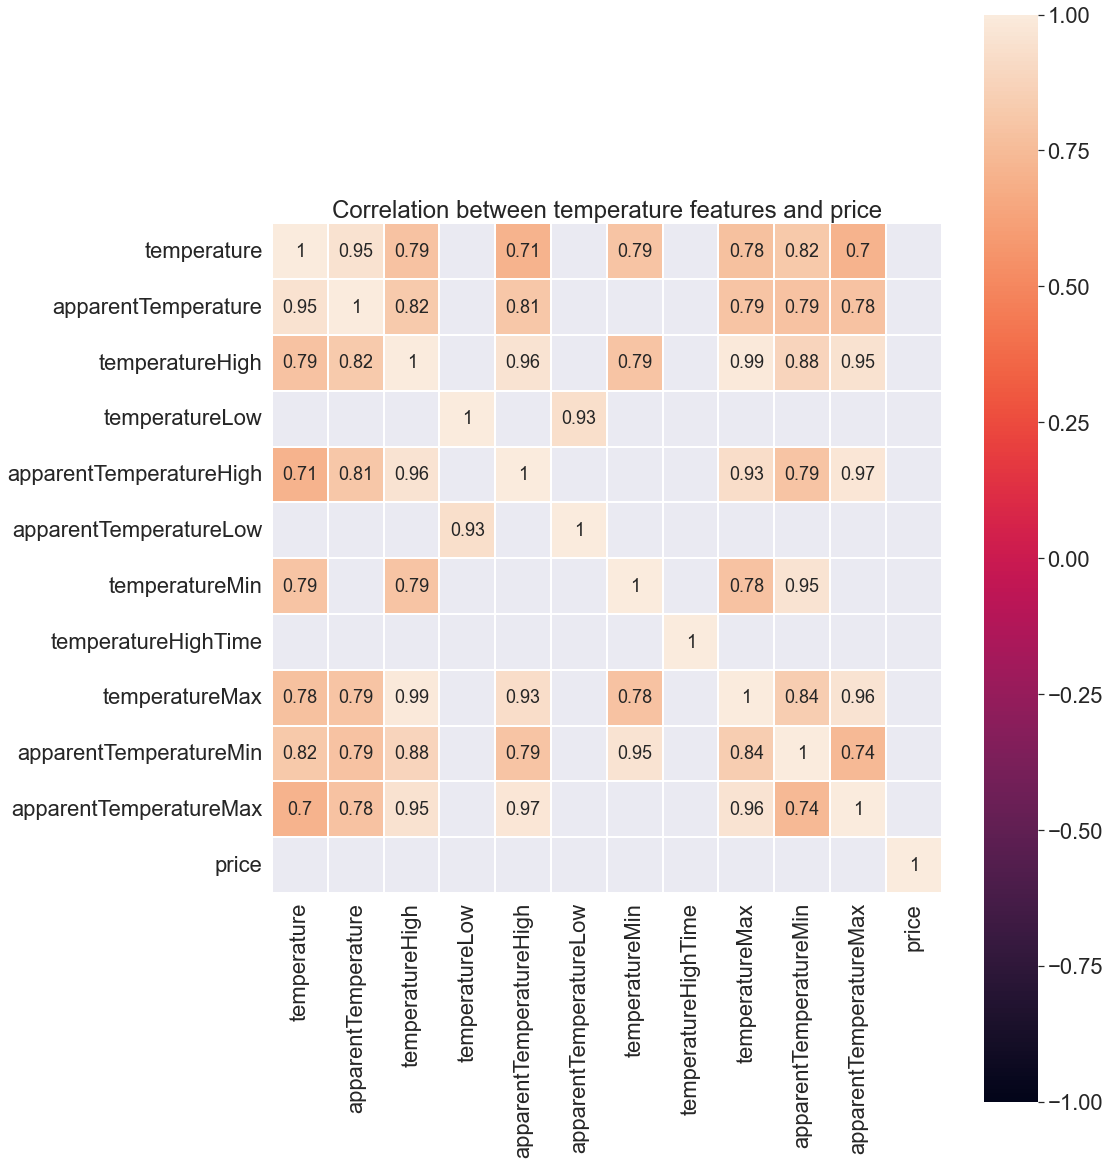

In [664]:
corr_temp = df_temp.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_temp[(corr_temp >= 0.7) | (corr_temp <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between temperature features and price')
plt.show()

Berdasarkan heatmap diatas semua fitur yang berkaitan dengan suhu memiliki korelasi yang lemah dengan kolom price.

Lalu kita akan menghapus semua yang tidak memberi dampak apapun terhadap model regresi kita.

In [665]:
data = data.drop(['temperature','apparentTemperature','temperatureHigh',
                'temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin',
                'temperatureHighTime','temperatureMax',
                'apparentTemperatureMin','apparentTemperatureMax'],axis=1)
data.shape

(693070, 30)

### Correlation Climate Features With Price
---

Kedua, kita akan memeriksa korelasi fitur yang berkaitan dengan iklim dan target fitur yaitu Price.

In [666]:
climate_column = ['precipIntensity', 'precipProbability',
                  'humidity', 'windSpeed', 'windGust',
                  'visibility', 'dewPoint', 'pressure',
                  'windBearing','cloudCover', 'uvIndex', 'ozone',
                  'moonPhase','precipIntensityMax','price']
df_clim = data[climate_column]
df_clim.head()

precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  \
0      10.000     32.70   1021.98           57        0.72        0  303.8   
1       4.786     41.83   1003.97           90        1.00        0  291.1   
2      10.000     31.10    992.28          240        0.03        0  315.7   
3      10.000     26.64   1013.73          310        0.00        0  291.1   
4      10.000     28.61    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  price  
0       0.30              0.1276    5.0  
1       0.64              0.1300   11.0  
2       0.68              0.1064    7.0  
3       0.75              0.0000   26.0  
4       0.72              0.0001    9.0

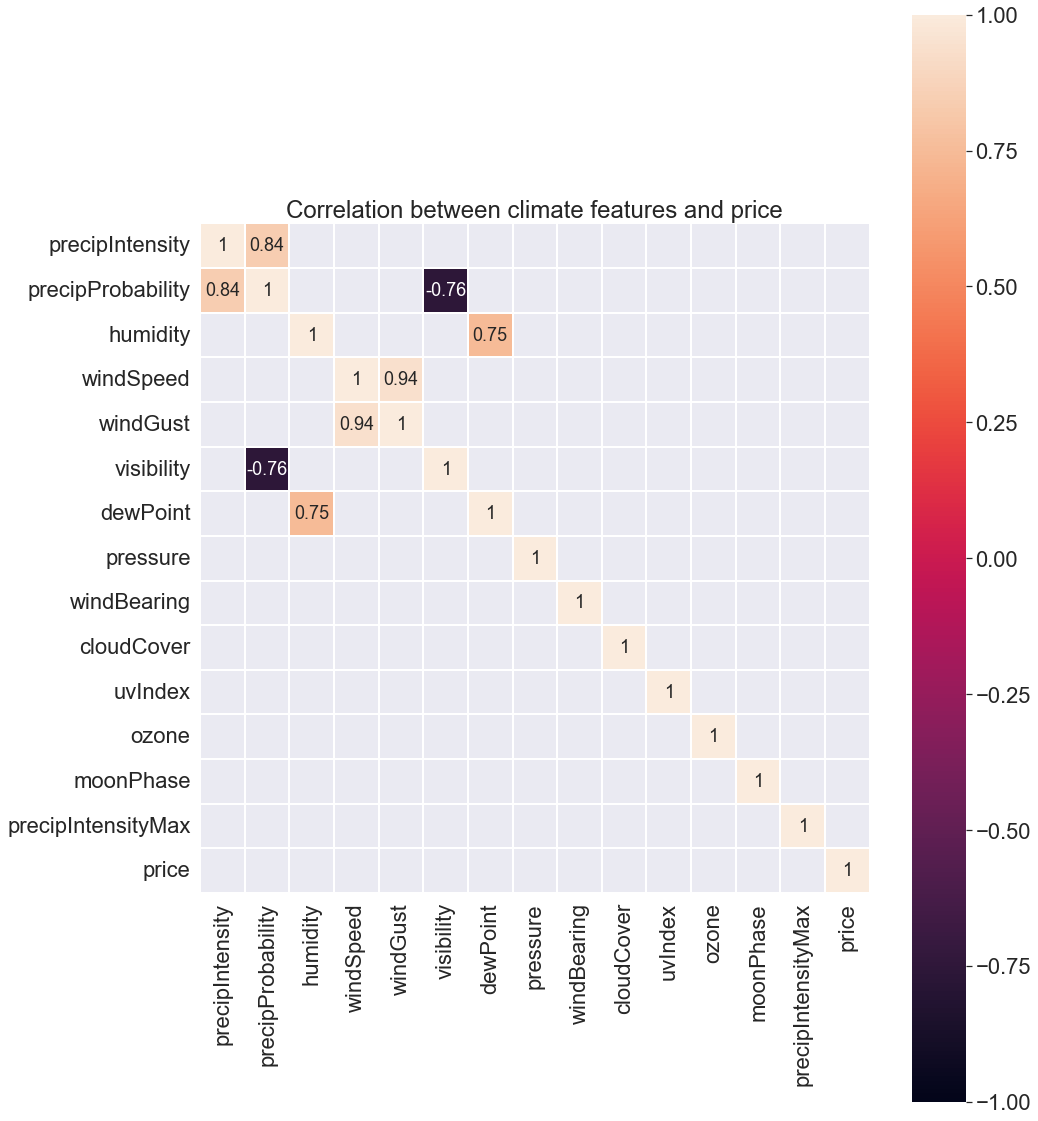

In [667]:
corr_clim = df_clim.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_clim[(corr_clim >= 0.7) | (corr_clim <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between climate features and price')
plt.show()

Seperti sebelumnya, semua fitur yang berkaitan dengan iklim juga memiliki korelasi yang lemah dengan fitur target kita yaitu price.

Sekali lagi, kita hapus semua fitur yang tidak membuat dampak apapun terhadap model regresi kita.

In [668]:
data = data.drop(['precipIntensity', 'precipProbability', 'humidity',
                'windSpeed','windGust', 'visibility', 'dewPoint',
                'pressure', 'windBearing','cloudCover', 'uvIndex',
                'ozone', 'moonPhase','precipIntensityMax'],axis=1)
data.shape

(693070, 16)

### Handling Unnecessary Categorical Features
---

Ketiga, kita akan memeriksa nilai categorical yang ada di dalam fitur-fitur dataset.

In [669]:
category_col = data.select_dtypes(include=['object','category']).columns.tolist()
for column in data[category_col]:
    print(f'{column} : {data[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

Kita dapat melihat bahwa fitur timezone hanya memiliki 1 nilai saja dan fitur product_id berisi banyak nilai-nilai yang tidak terdefinisi.

Mari kita hapus fitur-fitur itu

In [670]:
data = data.drop(['timezone','product_id'],axis=1)

data.shape

(693070, 14)

### Correlation Categorical Features With Price
---

Keempat, kita akan memeriksa korelasi fitur-fitur categorical dengan target fitur yaitu Price.

In [671]:
new_cat = ['source','destination','cab_type','name','short_summary',
           'icon','price']

df_cat = data[new_cat]
df_cat.head()

source    destination cab_type          name    short_summary  \
0  Haymarket Square  North Station     Lyft        Shared   Mostly Cloudy    
1  Haymarket Square  North Station     Lyft           Lux            Rain    
2  Haymarket Square  North Station     Lyft          Lyft           Clear    
3  Haymarket Square  North Station     Lyft  Lux Black XL           Clear    
4  Haymarket Square  North Station     Lyft       Lyft XL   Partly Cloudy    

                    icon  price  
0   partly-cloudy-night     5.0  
1                  rain    11.0  
2           clear-night     7.0  
3           clear-night    26.0  
4   partly-cloudy-night     9.0

In [672]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [673]:
df_cat_encode

source  destination  cab_type  name  short_summary  icon      price
0            5            7         0     7              4     5   5.000000
1            5            7         0     2              8     6  11.000000
2            5            7         0     5              0     1   7.000000
3            5            7         0     4              0     1  26.000000
4            5            7         0     6              6     5   9.000000
...        ...          ...       ...   ...            ...   ...        ...
693066      11            6         1    11              6     5  13.000000
693067      11            6         1    10              6     5   9.500000
693068      11            6         1     8              6     5  16.545125
693069      11            6         1     1              6     5  27.000000
693070      11            6         1     9              6     5  10.000000

[693070 rows x 7 columns]

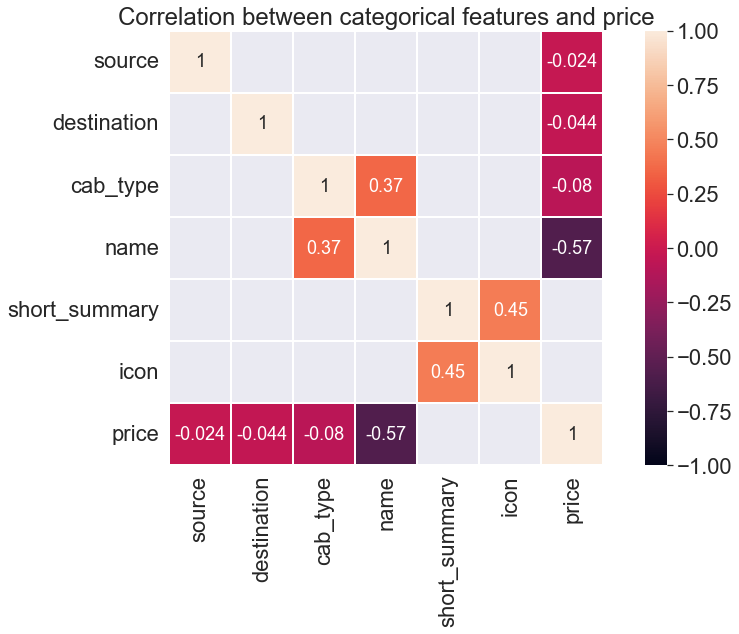

In [674]:
corr_cat = df_cat_encode.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_cat[(corr_cat >= 0.01) | (corr_cat <= -0.01)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between categorical features and price')
plt.show()

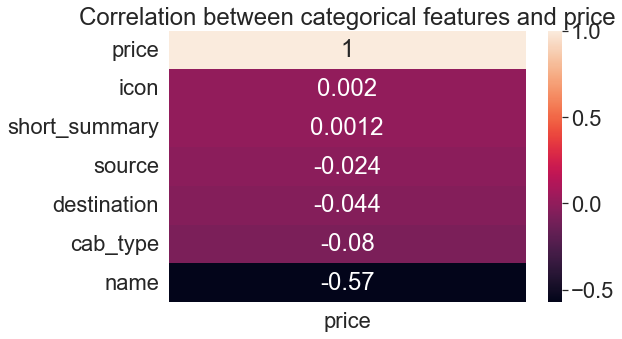

In [675]:
fig, ax = plt.subplots()
fig.set_size_inches((8,5))
sns.heatmap(corr_cat[['price']].sort_values(by='price',
                                            ascending=False),
                                            annot = True)

plt.title('Correlation between categorical features and price')
plt.show()

Berdasarkan heatmap diatas hanya fitur name yang memiliki korelasi yang relatif kuat daripada fitur-fitur lainnya. Fitur-fitur yang memiliki korelasi yang relatif lemah yaitu source, destination, dan cab_type.

Kita akan menghapus fitur-fitur yang memiliki korelasi yang relatif lemah kecuali cab_type. Fitur cab_type memiliki korelasi yang lebih kuat daripada 2 fitur lainnya.

In [676]:
df

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type                            product_id  \
0       North Station     Lyft                             lyft_line   
1       North Station     Lyft                          lyft_premier   
2       North Station     Lyft                                  lyft   
3       North Station     Lyft                           lyft_luxsuv   
4       North Station     Lyft                             lyft_plus   
...               ...      ...                                   ...   
693066      North End     Uber  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   
693067      North End     Uber  55c66225-fbe7-4fd5-9072-eab1ece5e23e   
693068      North End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   
693069      North End     Uber  6d318bcc-22a3-4af6-bddd-b409bfce1546   
693070      North End     Uber  997acbb5-e102-41e1-b155-9df7de0a73f2   

                name      price  distance  surge_multiplier  latitude  \
0             Shared   5.000000      0.44               1.0   42.2148   
1                Lux  11.000000      0.44               1.0   42.2148   
2               Lyft   7.000000      0.44               1.0   42.2148   
3       Lux Black XL  26.000000      0.44               1.0   42.2148   
4            Lyft XL   9.000000      0.44               1.0   42.2148   
...              ...        ...       ...               ...       ...   
693066        UberXL  13.000000      1.00               1.0   42.3519   
693067         UberX   9.500000      1.00               1.0   42.3519   
693068          Taxi  16.545125      1.00               1.0   42.3519   
693069     Black SUV  27.000000      1.00               1.0   42.3519   
693070      UberPool  10.000000      1.00               1.0   42.3519   

        longitude  temperature  apparentTemperature    short_summary  \
0        -71.0330        42.34                37.12   Mostly Cloudy    
1        -71.0330        43.58                37.35            Rain    
2        -71.0330        38.33                32.93           Clear    
3        -71.0330        34.38                29.63           Clear    
4        -71.0330        37.44                30.88   Partly Cloudy    
...           ...          ...                  ...              ...   
693066   -71.0643        37.05

In [677]:
df['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [678]:
df['icon'].unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day '], dtype=object)

In [679]:
data = data.drop(['icon'],axis=1)

data.head()

hour  day  month            source    destination cab_type          name  \
0     9   16     12  Haymarket Square  North Station     Lyft        Shared   
1     2   27     11  Haymarket Square  North Station     Lyft           Lux   
2     1   28     11  Haymarket Square  North Station     Lyft          Lyft   
3     4   30     11  Haymarket Square  North Station     Lyft  Lux Black XL   
4     3   29     11  Haymarket Square  North Station     Lyft       Lyft XL   

   price  distance  surge_multiplier  latitude  longitude    short_summary  
0    5.0      0.44               1.0   42.2148    -71.033   Mostly Cloudy   
1   11.0      0.44               1.0   42.2148    -71.033            Rain   
2    7.0      0.44               1.0   42.2148    -71.033           Clear   
3   26.0      0.44               1.0   42.2148    -71.033           Clear   
4    9.0      0.44               1.0   42.2148    -71.033   Partly Cloudy

### Correlation Numeric Features With Price
---

Selain itu, kita akan menghapus beberapa fitur seperti hour, day,month, latitude, longitude karena kita tidak membutuhkan mereka untuk saat ini

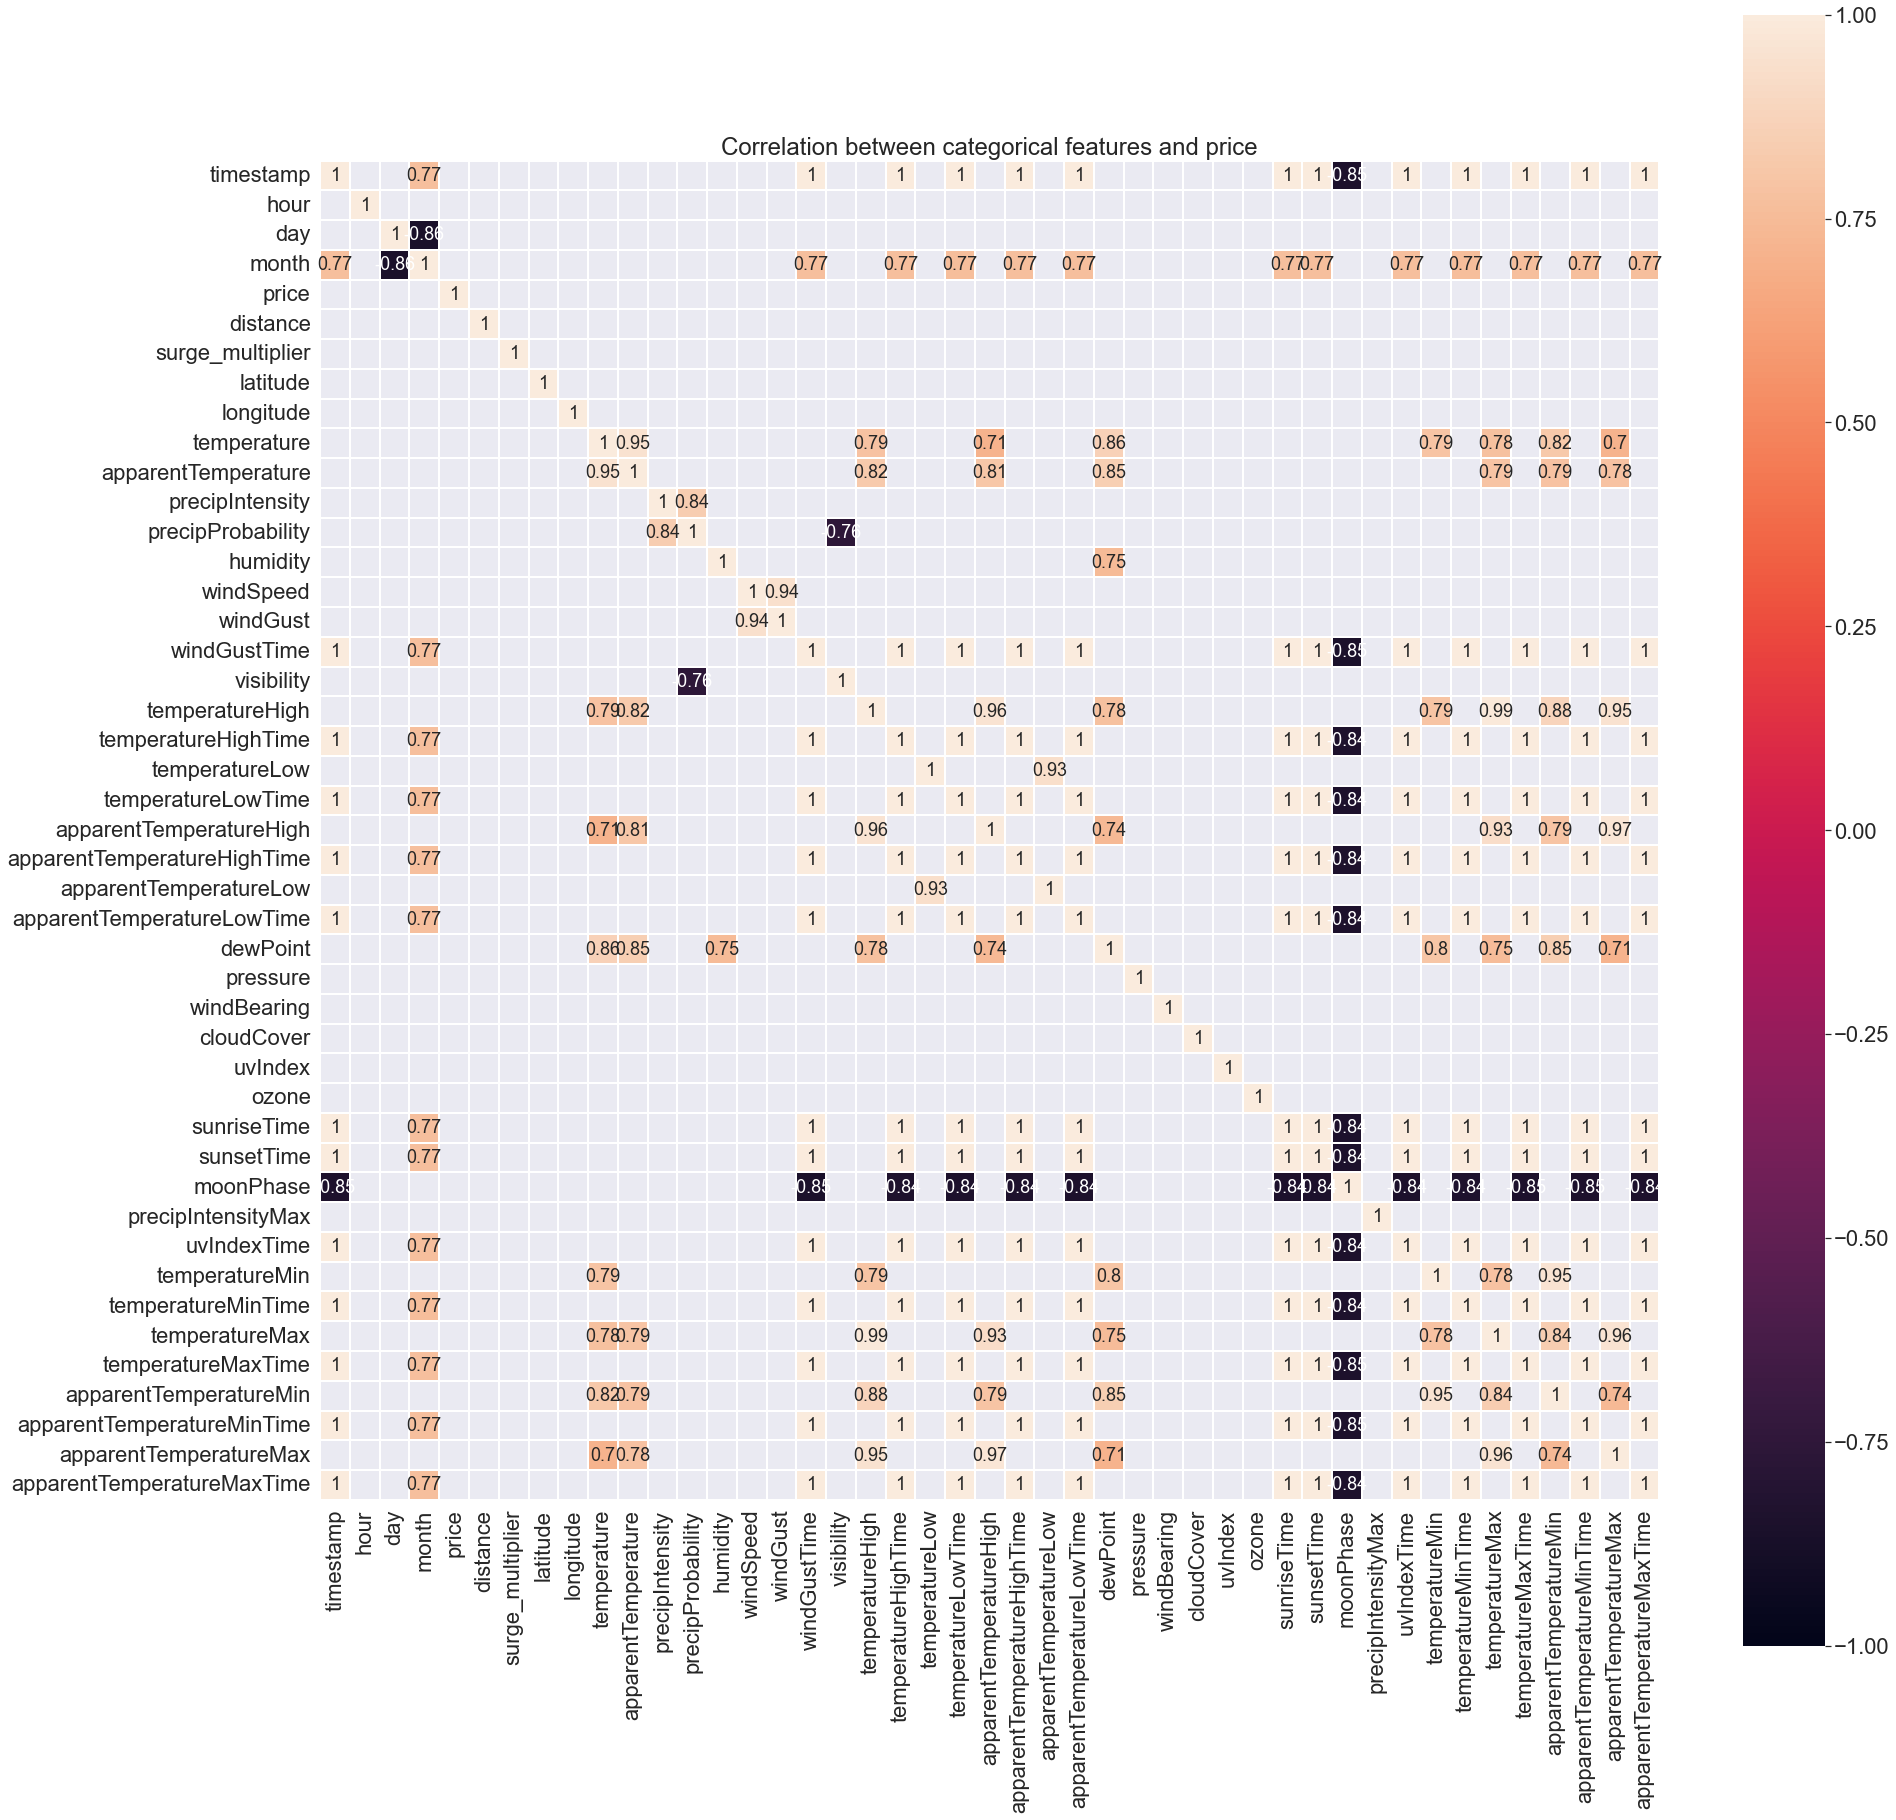

In [680]:
num = num_val.corr()

# set figure size
plt.figure(figsize=(30, 30))

# set condition to get a strong correlation between the variables
sns.set(font_scale=2)
sns.heatmap(num[(num >= 0.7) | (num <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True);

# specify name of the plot
plt.title('Correlation between categorical features and price')
plt.show()

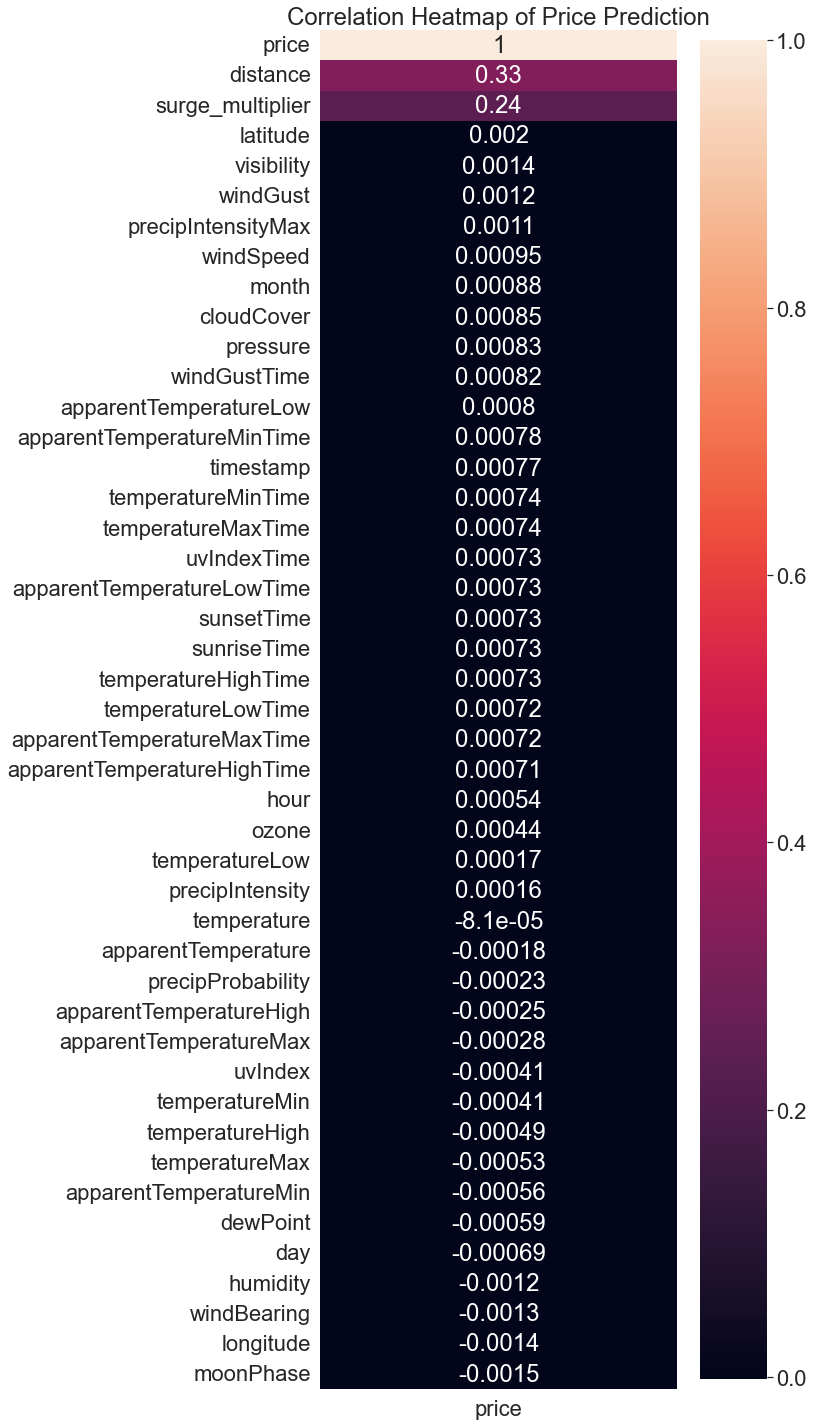

In [681]:
fig, ax = plt.subplots()
fig.set_size_inches((8,25))
sns.heatmap(num[['price']].sort_values(by='price', ascending=False),
                                                   annot = True)

plt.title('Correlation Heatmap of Price Prediction')
plt.show()

In [682]:
data.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'short_summary'],
      dtype='object')

In [683]:
data = data.drop(['hour','day','month','latitude','longitude'],axis=1)

data.head()

source    destination cab_type          name  price  distance  \
0  Haymarket Square  North Station     Lyft        Shared    5.0      0.44   
1  Haymarket Square  North Station     Lyft           Lux   11.0      0.44   
2  Haymarket Square  North Station     Lyft          Lyft    7.0      0.44   
3  Haymarket Square  North Station     Lyft  Lux Black XL   26.0      0.44   
4  Haymarket Square  North Station     Lyft       Lyft XL    9.0      0.44   

   surge_multiplier    short_summary  
0               1.0   Mostly Cloudy   
1               1.0            Rain   
2               1.0           Clear   
3               1.0           Clear   
4               1.0   Partly Cloudy

In [684]:
data.describe()

price       distance  surge_multiplier
count  693070.000000  693070.000000     693070.000000
mean       16.545009       2.189427          1.013868
std         8.945547       1.138935          0.091634
min         2.500000       0.020000          1.000000
25%         9.500000       1.280000          1.000000
50%        16.000000       2.160000          1.000000
75%        22.500000       2.920000          1.000000
max        92.000000       7.860000          3.000000

In [685]:
data_num = data.select_dtypes('number')
data_num

price  distance  surge_multiplier
0        5.000000      0.44               1.0
1       11.000000      0.44               1.0
2        7.000000      0.44               1.0
3       26.000000      0.44               1.0
4        9.000000      0.44               1.0
...           ...       ...               ...
693066  13.000000      1.00               1.0
693067   9.500000      1.00               1.0
693068  16.545125      1.00               1.0
693069  27.000000      1.00               1.0
693070  10.000000      1.00               1.0

[693070 rows x 3 columns]

## Handling Outliers

Sebelumnya kita sudah menghapus outliers pada fitur price berdasarkan harga maksimum. Sekarang kita akan memeriksa outlier lain yang kemunginan ada

Kita akan menggunakan metode Interquartil Range (IQR) untuk memeriksa batas atas dan batas bawah pencilan

In [686]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3-Q1

In [687]:
# harga yang melebihi batas atas
data[data['price']>(Q3+(1.5*IQR))]

source              destination cab_type          name  \
469      Boston University         Theatre District     Lyft  Lux Black XL   
639     Financial District                   Fenway     Lyft  Lux Black XL   
705          South Station                 Back Bay     Lyft       Lyft XL   
706          South Station                 Back Bay     Lyft     Lux Black   
707          South Station                 Back Bay     Lyft  Lux Black XL   
...                    ...                      ...      ...           ...   
692762    Theatre District                   Fenway     Lyft  Lux Black XL   
692775  Financial District  Northeastern University     Lyft  Lux Black XL   
692891  Financial District        Boston University     Lyft  Lux Black XL   
692962            Back Bay                North End     Uber     Black SUV   
693007            Back Bay                North End     Uber     Black SUV   

        price  distance  surge_multiplier    short_summary  
469      42.5      2.93              1.25        Overcast   
639      42.5      3.80              1.00           Clear   
705      42.5      3.25              2.50        Overcast   
706      52.5      3.25              2.00   Partly Cloudy   
707      67.5      3.25              2.00   Partly Cloudy   
...       ...       ...               ...              ...  
692762   42.5      4.31              1.00        Overcast   
692775   42.5      4.13              1.00        Overcast   
692891   47.5      5.42              1.00           Foggy   
692962   51.0      7.36              1.00   Mostly Cloudy   
693007   49.5      7.36              1.00   Mostly Cloudy   

[7981 rows x 8 columns]

In [688]:
# harga yang melebihi batas bawah
data[data['price']<(Q1-(1.5*IQR))]

Empty DataFrame
Columns: [source, destination, cab_type, name, price, distance, surge_multiplier, short_summary]
Index: []

Dapat kita simpulkan bahwa kita memiliki 5588 data outliers. Lalu kita akan menghapusnya.

In [689]:
print('Size before removing :',data.shape)
data= data[~((data['price']>(Q3+(1.5*IQR))))]
print('Size after removing :',data.shape)

Size before removing : (693070, 8)
Size after removing : (685089, 8)


## Encoding Data

In [690]:
data.head()

source    destination cab_type          name  price  distance  \
0  Haymarket Square  North Station     Lyft        Shared    5.0      0.44   
1  Haymarket Square  North Station     Lyft           Lux   11.0      0.44   
2  Haymarket Square  North Station     Lyft          Lyft    7.0      0.44   
3  Haymarket Square  North Station     Lyft  Lux Black XL   26.0      0.44   
4  Haymarket Square  North Station     Lyft       Lyft XL    9.0      0.44   

   surge_multiplier    short_summary  
0               1.0   Mostly Cloudy   
1               1.0            Rain   
2               1.0           Clear   
3               1.0           Clear   
4               1.0   Partly Cloudy

In [691]:
data['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [692]:
data['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [693]:
data['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [694]:
data['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [695]:
data['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [696]:
# Binary encode cab_type column
data['cab_type'] = data['cab_type'].replace({'Lyft': 0,
                                             'Uber': 1})

# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['source'] = label_encoder.fit_transform(data['source'])
data['destination'] = label_encoder.fit_transform(data['destination'])
data['name'] = label_encoder.fit_transform(data['name'])
data['short_summary'] = label_encoder.fit_transform(data['short_summary'])


In [697]:
data

source  destination  cab_type  name      price  distance  \
0            5            7         0     7   5.000000      0.44   
1            5            7         0     2  11.000000      0.44   
2            5            7         0     5   7.000000      0.44   
3            5            7         0     4  26.000000      0.44   
4            5            7         0     6   9.000000      0.44   
...        ...          ...       ...   ...        ...       ...   
693066      11            6         1    11  13.000000      1.00   
693067      11            6         1    10   9.500000      1.00   
693068      11            6         1     8  16.545125      1.00   
693069      11            6         1     1  27.000000      1.00   
693070      11            6         1     9  10.000000      1.00   

        surge_multiplier  short_summary  
0                    1.0              4  
1                    1.0              8  
2                    1.0              0  
3                    1.0              0  
4                    1.0              6  
...                  ...            ...  
693066               1.0              6  
693067               1.0              6  
693068               1.0              6  
693069               1.0              6  
693070               1.0              6  

[685089 rows x 8 columns]

## Reorder Dataframe Columns

In [698]:
data.columns

Index(['source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'short_summary'],
      dtype='object')

In [699]:
data

source  destination  cab_type  name      price  distance  \
0            5            7         0     7   5.000000      0.44   
1            5            7         0     2  11.000000      0.44   
2            5            7         0     5   7.000000      0.44   
3            5            7         0     4  26.000000      0.44   
4            5            7         0     6   9.000000      0.44   
...        ...          ...       ...   ...        ...       ...   
693066      11            6         1    11  13.000000      1.00   
693067      11            6         1    10   9.500000      1.00   
693068      11            6         1     8  16.545125      1.00   
693069      11            6         1     1  27.000000      1.00   
693070      11            6         1     9  10.000000      1.00   

        surge_multiplier  short_summary  
0                    1.0              4  
1                    1.0              8  
2                    1.0              0  
3                    1.0              0  
4                    1.0              6  
...                  ...            ...  
693066               1.0              6  
693067               1.0              6  
693068               1.0              6  
693069               1.0              6  
693070               1.0              6  

[685089 rows x 8 columns]

In [700]:
new_column = ['source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'short_summary', 'price']
data = data[new_column]

In [701]:
data

source  destination  cab_type  name  distance  surge_multiplier  \
0            5            7         0     7      0.44               1.0   
1            5            7         0     2      0.44               1.0   
2            5            7         0     5      0.44               1.0   
3            5            7         0     4      0.44               1.0   
4            5            7         0     6      0.44               1.0   
...        ...          ...       ...   ...       ...               ...   
693066      11            6         1    11      1.00               1.0   
693067      11            6         1    10      1.00               1.0   
693068      11            6         1     8      1.00               1.0   
693069      11            6         1     1      1.00               1.0   
693070      11            6         1     9      1.00               1.0   

        short_summary      price  
0                   4   5.000000  
1                   8  11.000000  
2                   0   7.000000  
3                   0  26.000000  
4                   6   9.000000  
...               ...        ...  
693066              6  13.000000  
693067              6   9.500000  
693068              6  16.545125  
693069              6  27.000000  
693070              6  10.000000  

[685089 rows x 8 columns]

## Export Dataframe to csv

In [702]:
data.to_csv('data_clean.csv', index = False)

In [703]:
data

source  destination  cab_type  name  distance  surge_multiplier  \
0            5            7         0     7      0.44               1.0   
1            5            7         0     2      0.44               1.0   
2            5            7         0     5      0.44               1.0   
3            5            7         0     4      0.44               1.0   
4            5            7         0     6      0.44               1.0   
...        ...          ...       ...   ...       ...               ...   
693066      11            6         1    11      1.00               1.0   
693067      11            6         1    10      1.00               1.0   
693068      11            6         1     8      1.00               1.0   
693069      11            6         1     1      1.00               1.0   
693070      11            6         1     9      1.00               1.0   

        short_summary      price  
0                   4   5.000000  
1                   8  11.000000  
2                   0   7.000000  
3                   0  26.000000  
4                   6   9.000000  
...               ...        ...  
693066              6  13.000000  
693067              6   9.500000  
693068              6  16.545125  
693069              6  27.000000  
693070              6  10.000000  

[685089 rows x 8 columns]

## Splitting Dataset

In [750]:
datas = pd.read_csv('data_clean.csv')
datas.head()

source  destination  cab_type  name  distance  surge_multiplier  \
0       5            7         0     7      0.44               1.0   
1       5            7         0     2      0.44               1.0   
2       5            7         0     5      0.44               1.0   
3       5            7         0     4      0.44               1.0   
4       5            7         0     6      0.44               1.0   

   short_summary  price  
0              4    5.0  
1              8   11.0  
2              0    7.0  
3              0   26.0  
4              6    9.0

Pilih fitur yang akan digunakan sebagai input dan target prediksi.

In [751]:
# prepare the training set and testing set
from sklearn.model_selection import train_test_split
#feature_col_names = datas.drop(['price'],axis=1)
#predicted_class_name = pd.DataFrame(datas['price'])
#feature_col_names = datas[['source', 'destination', 'cab_type', 'name', 'distance','surge_multiplier', 'short_summary']]
#predicted_class_name = datas['price']

# memilih semua fitur kecuali fitur target
#x = feature_col_names
# memilih fitur target
#y = predicted_class_name
x = datas.iloc[:,0:-1].values
y = datas.iloc[:,-1].values
print(y)

[ 5.         11.          7.         ... 16.54512549 27.
 10.        ]


In [752]:
print('size of x = {0}'.format(x.shape))
print('size of y = {0}'.format(y.shape))
print(x.shape != y.shape)

size of x = (685089, 7)
size of y = (685089,)
True


Tahapan selanjutnya adalah melakukan pemisahan data untuk training dan testing.

Mengapa ini penting? Hal ini diperlukan agar kita bisa melihat bagaimana algoritma belajar untuk melakukan prediksi pada testing data. Kita akan membagi data menjadi 70% training dan 30% testing menggunakan fungsi train_test_split() dari sklearn.model_selection.

In [769]:
from sklearn.model_selection import train_test_split

# split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [785]:
print('{0:0.2f}% ada pada training set'.format((len(x_train)/len(datas.index)) * 100))
print('{0:0.2f}% ada pada training set'.format((len(x_test)/len(datas.index)) * 100))

70.00% ada pada training set
30.00% ada pada training set


In [771]:
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of x_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of x_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of x_train is: (479562, 7)
The shape of x_test is: (205527, 7)
The shape of y_train is: (479562,)
The shape of y_test is: (205527,)


In [772]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **MODELLING**
---

## **BUILDING MODEL**

Sebelumnya kita telah melakukan pemisahan data untuk data training dan data testing, langkah berikutnya yaitu membangun model yang akan kita pakai

In [773]:
# Building Model

# Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

Langkah berikutnya yaitu melakukan training dan testing pada model dengan memasukkan x_train dan y_train kita ke dalam model machine learning untuk memprediksi hasilnya

In [774]:
print("Train Score:", reg.score(x_train,y_train))
print("Test Score:", reg.score(x_test,y_test))

Train Score: 0.4851751020718126
Test Score: 0.4818557726000231


## **Simpan Model dengan Pickle**

In [791]:
# save model using pickle
import pickle
pickle.dump(reg, open('model.pkl', 'wb'))

# **CONCLUSION**
---

- Destination paling populer adalah Financial District.
- Luxurious cabs have higher average prices compared to the shared cabs.
- The most popular hour for ride requests is between 11:00 pm and 12:00 midnight.
- The most expensive hour to request for uber rides is at 9:00 am and 8:00 pm while for lyft is between 11:00 pm and 12:00 midnight.
- The regression model has a higher R Squared score compared to the Random Forest Regressor.

Ada perbedaan faktor-faktor yang mempengaruhi tarif taksi yang pelanggan harus tahu yaitu :
- Waktu
- Jarak
- Rute yang dilalui
- Tempat Asal dan Tempat Tujuan
- Perusahaan Jasa Layanan Transportasi. Lyft memiliki harga yang cukup mahal dibandingkan dengan Uber.
- Tipe Kendaraan yang dimiliki perusahaan jasa layanan transportasi. Pada Lyft, tipe kendaraan yang paling mahal adalah Black Lux Xl. Sedangkan pada Uber adalah Black SUV. Tipe kendaraan yang paling murah adalah Uber Pool dan Shared

# **MODEL INFERENCE**
---

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang kita gunakan adalah data buatan sendiri.

In [792]:
datas

source  destination  cab_type  name  distance  surge_multiplier  \
0            5            7         0     7      0.44               1.0   
1            5            7         0     2      0.44               1.0   
2            5            7         0     5      0.44               1.0   
3            5            7         0     4      0.44               1.0   
4            5            7         0     6      0.44               1.0   
...        ...          ...       ...   ...       ...               ...   
685084      11            6         1    11      1.00               1.0   
685085      11            6         1    10      1.00               1.0   
685086      11            6         1     8      1.00               1.0   
685087      11            6         1     1      1.00               1.0   
685088      11            6         1     9      1.00               1.0   

        short_summary      price  
0                   4   5.000000  
1                   8  11.000000  
2                   0   7.000000  
3                   0  26.000000  
4                   6   9.000000  
...               ...        ...  
685084              6  13.000000  
685085              6   9.500000  
685086              6  16.545125  
685087              6  27.000000  
685088              6  10.000000  

[685089 rows x 8 columns]

In [793]:
x = datas[['source', 'destination', 'cab_type', 'name', 'distance','surge_multiplier', 'short_summary']]
y = datas['price']
print(y)

0          5.000000
1         11.000000
2          7.000000
3         26.000000
4          9.000000
            ...    
685084    13.000000
685085     9.500000
685086    16.545125
685087    27.000000
685088    10.000000
Name: price, Length: 685089, dtype: float64


In [794]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [795]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [796]:
print("Train Score:", reg.score(X_train,y_train))
print("Test Score:", reg.score(X_test,y_test))

Train Score: 0.4851751020718126
Test Score: 0.48185577260002344


        'source': 11, option
        'destination': 6, option
        'cab_type': 0, option
        'name': 11, option
        'distance': 1.0, input
        'surge_multiplier': 1.0, input
        'short_summary': 6 option

In [797]:
def user_input_features():
    new_data = pd.DataFrame({
        'source': 5,
        'destination': 7,
        'cab_type': 0,
        'name': 2,
        'distance': 5.0,
        'surge_multiplier': 1.0,
        'short_summary': 1
    }, index=[0])
    features = pd.DataFrame(new_data, index=[0])
    return features

In [798]:
input_df = user_input_features()
input_df

source  destination  cab_type  name  distance  surge_multiplier  \
0       5            7         0     2       5.0               1.0   

   short_summary  
0              1

In [799]:
#Combines user input features with entire dataset
#This will be useful for the encoding phase
rideshare_kaggle_dataset = datas
rideshare_kaggle_dataset = rideshare_kaggle_dataset.drop(columns=['price'])

data = pd.concat([input_df,rideshare_kaggle_dataset],axis=0)
data = data[:1]

In [800]:
# Reads in saved classification model
load_clf = pickle.load(open('model.pkl', 'rb'))

# Apply model to make predictions
prediction = load_clf.predict(data)
print('Prediction : $', prediction)

Prediction : $ [26.48491688]
